# MSDS 7331 Data Mining: Project 2

***  

#### Resubmitall 2017.11.18

***  

Team: Andrew Abbott, Vivek Bejugama, Patrick McDevitt, Preeti Swaminathan



 ***  
ID Tag  
<a name='toc'></a>  
*** 


### TOC

<a href='#intro'>Introduction</a>  

#### Task 1  

 * <a href='#dp.01.t1'>Data Preparation - Part 1</a>  
 * <a href='#dp.02.t1'>Data Preparation - Part 2</a>  
 * <a href='#me.01.t1'>Modeling & Evaluation - 1</a>  
 * <a href='#me.02.t1'>Modeling & Evaluation - 2</a>  
 * <a href='#me.03.t1'>Modeling & Evaluation - 3</a>  
 * <a href='#me.04.t1'>Modeling & Evaluation - 4</a>  
 * <a href='#me.05.t1'>Modeling & Evaluation - 5</a>  
 * <a href='#me.05.t1'>Modeling & Evaluation - 6</a>  

#### Task 2   

 * <a href='#dp.01.t2'>Data Preparation - Part 1</a>  
 * <a href='#dp.02.t2'>Data Preparation - Part 2</a>  
 * <a href='#me.01.t2'>Modeling & Evaluation - 1</a>  
 * <a href='#me.02.t2'>Modeling & Evaluation - 2</a>  
 * <a href='#me.03.t2'>Modeling & Evaluation - 3</a>  
 * <a href='#me.04.t2'>Modeling & Evaluation - 4</a>  
 * <a href='#me.05.t2'>Modeling & Evaluation - 5</a>  
 * <a href='#me.05.t2'>Modeling & Evaluation - 6</a>  

<a href='#deploy'>Deployment</a>  

<a href='#except'>Exceptional Work</a>  


 ***  
<a name='intro'></a>  
<a href='#toc'>Return to Table of Contents</a>  
*** 



### Introduction  
***
	
We are using an online news popularity dataset from the UCI Machine Learning Repository. The dataset is a collection of 61 heterogeneous features for approximately 40,000 articles published by Mashable (www.mashable.com). The features are not the articles, but are extracted from the articles, such as word counts, title word counts, and keyword associations.  The data represents a two year period of published articles, ending in January 2015.  

We intend to mine this data to understand what parameters can influence an article to be shared on social media more than others.  The goal is to predict the number of shares in social networks (popularity).  

The business use of this data set / data mining project is ultimately to establish relationships that enable to predict how many social media shares an article published on _www.mashable.com_ is likley to generate - with the idea that a more socially shared article has higher business value - increasing traffic to the site, and consequently, potential for higher earnings revenue associated to the increased web traffic. The user of this model is both the publishers for _mashable.com_ for article selection, and also for authors, attempting to create content that has higher value on sites like _mashable.com_.  

Measures for a successful outcome from a predictive model for this study will be based on overall accuracy metrics (e.g., confusion matrix), as well as AUC type metrics. A baseline (non-predictive, random) scoring will establish a baseline for these metrics, and then the predictive model can be assessed against a random model for measurement of improvement, i.e., value of the model.  

The data is located at https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity  

***  
__Citation Request__ :  
***  
K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent Decision Support System for Predicting the Popularity of Online News. Proceedings of the 17th EPIA 2015 - Portuguese Conference on Artificial Intelligence, September, Coimbra, Portugal.  
***  


- The data set has features in these 6 broad categories :  
_(ref - see citation reference at beginning of this document)_  
    - Words  
        - Number of words of the title/content  
        - Average word length  
        - Rate of unique/non-stop words of contents
    - Links
        - Number of links  
        - Number of links to other articles in Mashable  
    - Digital Media  
        - Number of images/videos  
    - Time  
        - Day of the week/weekend  
    - Keywords  
        - Number of keywords  
        - Worst/best/average keywords (#shares)  
        - Article category  
    - NLP  
        - Closeness to five LDA topics  
        - Title/Text polarity/subjectivity  
        - Rate and polarity of positive/negative words  
        - Absolute subjectivity/polarity level  
     




## Classification Model Development - Overview  

#### The request for this project includes 2 different classification tasks and (at least) the development and interpretation of 3 different classification models for each task. This section is provided as an overview of the structure of the model development that was employed for both tasks, and for each classifier evaluation. Due to the length of this report, this section is provided as an aid to follow the logic employed throughout this report.

#### The report includes 2 classification tasks :  

 1.0 - Prediction of article popularity for articles proposed for publication on _mashable.com_  web-site. This is a binary prediction model (popular / not-popular). This was the original intention of the development of this dataset.  
 2.0 - Assignment of each article to the appropriate __data_channel__. This is the additional task developed by this team, in fulfillment of the additional use of the data set to provide an appropriate business use. In this case, the problem is a multi-classifier problem, to identify to which of 7 data channels (e.g., World, Entertainment, Business, Technology, ...) an article is most appropriate.  
 
#### This report includes 4 classifier models for each of the above 2 classification tasks :  

 1. - Logistic Regression  
 2. - Decision Tree  
 3. - Random Forest  
 4. - Naïve Bayes  
 
#### The model development approach in all cases is as described here below :

1.	**Holdout** 20% of data set for final sacred test set

2.	Split remaining 80% into train / test for grid search  

3.	Run **Grid Search with Cross-Validation = 3** on each classification type  
    a.	Search on range of model parameters to identfy best set of parameters within the searched range  

4.	Identify best accuracy / best parameters from **Grid Search**
    a.	Run each classifier model with the best parameters that were identified from the grid search. This classifier model is then used in the subsequent full **10-fold Cross-Validation** verification  
    b.	Verify results are consistent with grid search model results

5.	Run full **10-fold CV** with the best parameters for each classifier
    a.	Verify results are consistent with prior grid search results  
    b.	Evaluate the 10-fold CV on model metrics (in our case Accuracy)

6.	Identify best overall model from the 4 classifiers after 10-fold CV  

7.	 Run best overall model on **Holdout** 20% sacred data set  
    a.	Report results from this test set run as expected model capability  

8.	Identify **feature importance** from each of the 4 classifier models (best model each)    
    a.	Consider if feature scaling is beneficial for interpretation  

9.	Identify strengths / weakness of model prediction capability (e.g., some classes well predicted or not)


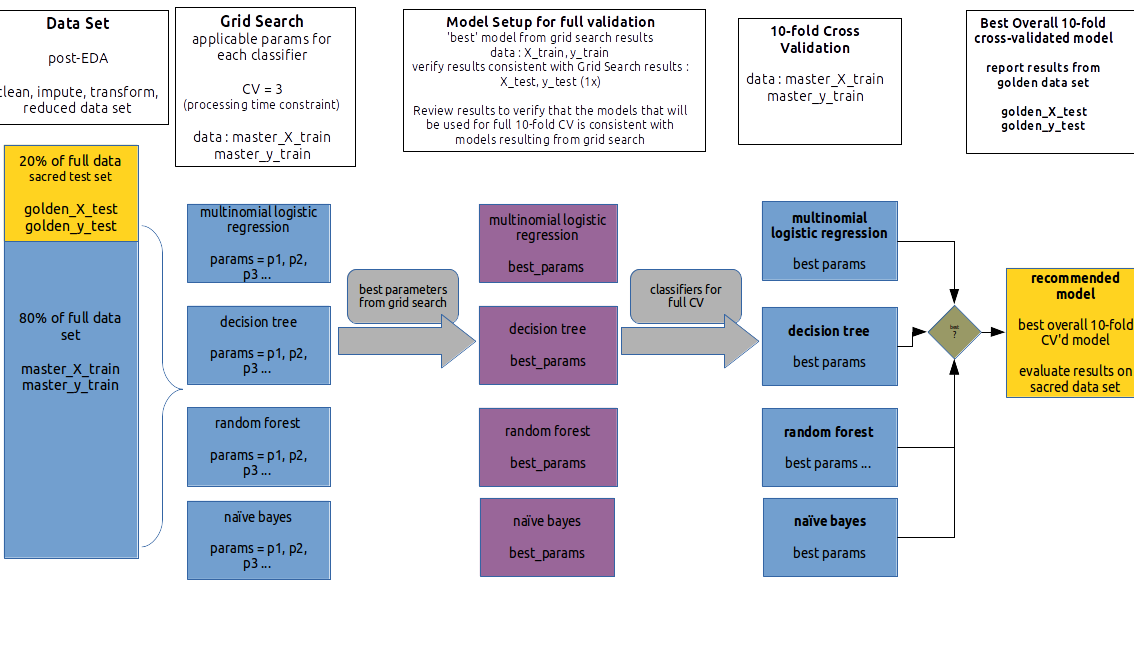

In [1]:
from IPython.display import Image
Image("model_development_method.png")

***  
<a name='me.01.t1'></a>  
<a href='#toc'>Return to Table of Contents</a>  
***  

# Modeling & Evaluation - Part 1	

We intend to mine this data to understand what parameters can influence an article to be shared on social media more than others.  The goal in _Task 1_ is to predict the number of shares in social networks (popularity).  

The business use of this data set / data mining project is ultimately to establish relationships that enable to predict how many social media shares an article published on _www.mashable.com_ is likley to generate - with the idea that a more socially shared article has higher business value - increasing traffic to the site, and consequently, potential for higher earnings revenue associated to the increased web traffic. The user of this model is both the publishers for _mashable.com_ for article selection, and also for authors, attempting to create content that has higher value on sites like _mashable.com_.  

Measures for a successful outcome from a predictive model for this study will be based on overall **accuracy** metrics. A baseline (non-predictive, random) scoring will establish a baseline for these metrics, and then the predictive model can be assessed against a random model for measurement of improvement, i.e., value of the model.  

### Risk
For this business case, we consider 2 risks :  
 - 1 - there is an article that has high potential for high popularity and our model classifies this incorrectly as not popular.   To identify this risk we will keep a check on False Negatives and **Recall**.  
 - 2 - there are articles that are not likely to be popular, and our model incorrectly classifies the article as high potential for high popularity  
 To identify this risk we will keep a check on False Positives and **Precision**.
 
 Since we are looking at both Recall and Precision, **F-Score** is also considered for our evaluation metrics. Additionally, we also look at **processing speed**. In case when two or more model has good evaluation metrics, we would decide best model based on speed.
  
  In the first case, our model is missing opportunity to identify a highly valuable asset, whereas in the second case our model highly values that which has no value. For our business case, the distinction between popular and not_popular was established at the median value for number of shares of each article. In this case, then, there are, by this measure, an equal number of popular and not_popular articles. 

#### Import required packages  


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore',DeprecationWarning)
import seaborn as sns
import time

from pylab import rcParams
#import hdbscan

from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler

#from sklearn.datasets import make_blobs

from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn import metrics as mt
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import confusion_matrix as conf
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score

from tabulate import tabulate

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### Read in dataset from .csv file  

In [6]:
data_dir = '../../data/'
data_file = 'OnlineNewsPopularity.csv'

file_2_read = data_dir + data_file
df = pd.read_csv(file_2_read)  

In [7]:
df.columns = df.columns.str.strip()
col_names = df.columns.values.tolist()


***  
<a name='dp.01.t1'></a>
<a href='#toc'>Return to Table of Contents</a>  
***  


## Data Preparation Part 1	

### Task 1 data set definition  

 - For Task 1 we intend to mine this data to understand what parameters can influence an article to be shared on social media more than others.  The goal is to predict the number of shares in social networks (popularity). 
 - The business use of this data set / data mining project is ultimately to establish relationships that enable to predict how many social media shares an article published on _www.mashable.com_ is likley to generate - with the idea that a more socially shared article has higher business value - increasing traffic to the site, and consequently, potential for higher earnings revenue associated to the increased web traffic. The user of this model is both the publishers for _mashable.com_ for article selection, and also for authors, attempting to create content that has higher value on sites like _mashable.com_.   
 - In order to support this classification task, we create a new dependent variable column __popular__  which is true if the value of __shares__ is greater than 1400.

#### Remove variables that are not useful

In [8]:
popular_binary = np.where(df['shares'] > 1400, True, False)

df.insert(loc = 0, column = 'popular', value = popular_binary)

del df['shares'] 

In [9]:
del df['n_non_stop_words']
del df['n_non_stop_unique_tokens']
del df['n_unique_tokens']
del df['url']

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
timedelta,39644.0,354.530471,214.163767,8.00000,164.000000,339.000000,542.000000,731.000000
n_tokens_title,39644.0,10.398749,2.114037,2.00000,9.000000,10.000000,12.000000,23.000000
n_tokens_content,39644.0,546.514731,471.107508,0.00000,246.000000,409.000000,716.000000,8474.000000
num_hrefs,39644.0,10.883690,11.332017,0.00000,4.000000,8.000000,14.000000,304.000000
num_self_hrefs,39644.0,3.293638,3.855141,0.00000,1.000000,3.000000,4.000000,116.000000
num_imgs,39644.0,4.544143,8.309434,0.00000,1.000000,1.000000,4.000000,128.000000
num_videos,39644.0,1.249874,4.107855,0.00000,0.000000,0.000000,1.000000,91.000000
average_token_length,39644.0,4.548239,0.844406,0.00000,4.478404,4.664082,4.854839,8.041534
num_keywords,39644.0,7.223767,1.909130,1.00000,6.000000,7.000000,9.000000,10.000000
data_channel_is_lifestyle,39644.0,0.052946,0.223929,0.00000,0.000000,0.000000,0.000000,1.000000


#### Assign certain variables to type integer, as appropriate

In [11]:
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ...  convert the data type to Integer
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

to_int = ['timedelta','n_tokens_title', 'n_tokens_content',
    'num_hrefs','num_self_hrefs', 'num_imgs', 'num_videos', 'num_keywords',
    'weekday_is_monday',
    'weekday_is_tuesday',
    'weekday_is_wednesday',
    'weekday_is_thursday',
    'weekday_is_friday',
    'weekday_is_saturday',
    'weekday_is_sunday',
    'is_weekend']
    

df[to_int] = df[to_int ].astype(np.int64)

In [12]:
df[df.duplicated()]

,popular,timedelta,n_tokens_title,n_tokens_content,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity


#### Impute kw_avg_max for 0-values and re-scale to standard normal scale

 - A small number of rows have 0 value for __kw_avg_max__, which is completely out of range for the remaining rows of this variable.    
 - We will impute these rows to median value of the column  
 
 - The magnitude of this column of data is markedly different than the range of values in the remaining columns in the data set. To bring this back in line, we will re-scale the values in this column to standard normal range

In [13]:

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ...  impute to median value for a few rows of kw_avg_max
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

condition = df['kw_avg_max'] == 0
df.loc[condition, 'kw_avg_max'] = df.kw_avg_max.median()

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ...  scale to standard normal scale
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

df.kw_avg_max = (df.kw_avg_max - df.kw_avg_max.mean()) / df.kw_avg_max.std()


#### Constant offset for variables with min value < 0  

 - This allows to consider these variables for ln() transform if highly right-skewed and also supports some classification models that only accept independent variables that are > 0  
 - Method here is to just add -1 * min_value of any column for which min_value < 0

In [14]:
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ...  for all columns with negative values, add +1 to all values in the column
# ...  - the only columns with negative values are polarity / sentiment measures
# ...  - adding a constant to all values does not modify distributions
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

df_numeric = df.select_dtypes(['number'])
numeric_col_names = df_numeric.columns.values.tolist()

# ... store min value for each column

df_mins = df.min()

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ...  loop on each column, test for min < 0, add constant as applicable
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

for column in numeric_col_names :
    if df_mins[column] < 0 :
        df[column] = df[column] - df_mins[column]
        
#        print('--> min_value < 0 adjusted : ', column, df_mins[column])

#### Ln() transform for variables that are right skewed (skewness > 1)  

 - This facilitiates maintaining more normally distributed residuals for regression models  
 - Likely, this will not be needed for the classification task, at present, but also does not have negative effects for this current activity


In [15]:
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ...  ln() transform right skewed distribution variables (skewness > 1)
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

df_numeric = df.select_dtypes(['number'])

numeric_col_names = df_numeric.columns.values.tolist()

# ... store min value for each column

df_mins = df.min()

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ...  loop on each column, test for skewness, create new column if conditions met
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

columns_to_drop = []

for column in numeric_col_names:
    sk = df[column].skew()
    
    if(sk > 1):
        new_col_name='ln_' + column
        print (column, sk, new_col_name)
        
        if df_mins[column] > 0:
            df[new_col_name] = np.log(df[column])
            columns_to_drop.append(column)
            
        elif df_mins[column] == 0:
            df_tmp = df[column] + 1
            df[new_col_name] = np.log(df_tmp)
            columns_to_drop.append(column)
            
        else:
            print('--> Ln() transform not completed -- skew > 1, but min value < 0 :', column, '!!')
            
            
# ... delete tmp data

del df_tmp
del df_mins
del df_numeric

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ...  based on inspection, a few of these are just not valid ranges in ln() space
# ...  -- just delete these few back out of the data set
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

print (columns_to_drop)

del df['ln_LDA_00']
del df['ln_LDA_01']
del df['ln_LDA_02']
del df['ln_LDA_03']
del df['ln_LDA_04']
columns_to_drop.remove('LDA_00')
columns_to_drop.remove('LDA_01')
columns_to_drop.remove('LDA_02')
columns_to_drop.remove('LDA_03')
columns_to_drop.remove('LDA_04')

# ...  these are binary indicators ... so no need to ln-transform

del df['ln_weekday_is_monday']
del df['ln_weekday_is_tuesday']
del df['ln_weekday_is_wednesday']
del df['ln_weekday_is_thursday']
del df['ln_weekday_is_friday']
del df['ln_weekday_is_saturday']
del df['ln_weekday_is_sunday']
del df['ln_is_weekend']
columns_to_drop.remove('is_weekend')
columns_to_drop.remove('weekday_is_monday')
columns_to_drop.remove('weekday_is_tuesday')
columns_to_drop.remove('weekday_is_wednesday')
columns_to_drop.remove('weekday_is_thursday')
columns_to_drop.remove('weekday_is_friday')
columns_to_drop.remove('weekday_is_saturday')
columns_to_drop.remove('weekday_is_sunday')

#columns_to_drop.remove('data_channel')

print ('\n-----------------------------------\n')
print ('Number of current columns in dataset :', len(df.columns))

df.drop(columns_to_drop, axis = 1, inplace = True)

#df.info()


n_tokens_content 2.94542193879 ln_n_tokens_content
num_hrefs 4.0134948282 ln_num_hrefs
num_self_hrefs 5.17275110576 ln_num_self_hrefs
num_imgs 3.94659584465 ln_num_imgs
num_videos 7.0195327863 ln_num_videos
data_channel_is_lifestyle 3.99301914336 ln_data_channel_is_lifestyle
data_channel_is_entertainment 1.6835848094 ln_data_channel_is_entertainment
data_channel_is_bus 1.87687018599 ln_data_channel_is_bus
data_channel_is_socmed 3.75887963097 ln_data_channel_is_socmed
data_channel_is_tech 1.61997576469 ln_data_channel_is_tech
data_channel_is_world 1.40516938412 ln_data_channel_is_world
kw_min_min 2.37494728018 ln_kw_min_min
kw_max_min 35.3284337312 ln_kw_max_min
kw_avg_min 31.3061081027 ln_kw_avg_min
kw_min_max 10.3863716348 ln_kw_min_max
kw_max_avg 16.4116695554 ln_kw_max_avg
kw_avg_avg 5.76017729162 ln_kw_avg_avg
self_reference_min_shares 26.2643641603 ln_self_reference_min_shares
self_reference_max_shares 13.8708490494 ln_self_reference_max_shares
self_reference_avg_sharess 17.914093

***  
<a name='dp.02.t1'></a>
<a href='#toc'>Return to Table of Contents</a>  
***  


## Data Preparation Part 2  

#### Data Selection - Task 1 - Popularity classification

- There are 60 columns in the original data set; we added an additonal column based on the value of shares as explained above. 
    
- From this data set, we did a simple correlation matrix to look for variables that are highly correlated with each other that could be removed with little loss of information.

- With that downselection, we proceeded with additional evaluation of these remaining variables.
    
- We recognize that there is likely additional opportunity for modeling improvements with the remaining variables; we will look to re-evaluate the data set to further consider that with future work. Those opportunities will become apparent following the outcome of this present evaluation.    

In [16]:

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ... display highest correlation pairs from corr() matrix 
# ...
# ... https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

df_numeric = df.select_dtypes(['number'])

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n = 5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels = labels_to_drop).sort_values(ascending = False)
    return au_corr[0:n]

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ... list out Top30 correlations
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

n_val = 30

top_30_corr_list = get_top_abs_correlations(df_numeric, n_val)
print("\n\n-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-")
print("Top Absolute Correlations\n")
print(top_30_corr_list)


icor = 0
drop_column = list()
while (top_30_corr_list[icor] > 0.65):
    drop_column.append(top_30_corr_list[top_30_corr_list == top_30_corr_list[icor]].index[0][0])
    icor += 1

drop_column = list(set(drop_column))

print("\n\n-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-")
print("Columns Recommended for removal based on correlation > 0.65")
print("-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-\n")

print("\n".join(sorted(drop_column)))

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ... drop one of the high correlation columns (2nd of the pair)
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

df = df.drop(drop_column, axis = 1)

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ... show correlation test with remaining, to confirm
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

df_reduced_numeric = df.select_dtypes(['number'])

top_30_corr_list = get_top_abs_correlations(df_reduced_numeric, n_val)

print("\n\n-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-")
print("\n\nTop Absolute Correlations (2nd Pass)\n")
print(top_30_corr_list)




-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Top Absolute Correlations

ln_self_reference_max_shares  ln_self_reference_avg_sharess       0.994639
ln_self_reference_min_shares  ln_self_reference_avg_sharess       0.971014
ln_kw_max_min                 ln_kw_avg_min                       0.946087
ln_self_reference_min_shares  ln_self_reference_max_shares        0.945943
kw_min_avg                    ln_kw_min_max                       0.926784
ln_kw_max_avg                 ln_kw_avg_avg                       0.899409
LDA_02                        ln_data_channel_is_world            0.836618
timedelta                     ln_kw_min_min                       0.822783
kw_max_max                    ln_kw_min_min                       0.820625
rate_negative_words           ln_global_rate_negative_words       0.782517
LDA_00                        ln_data_channel_is_bus              0.774651
average_token_length          ln_n_tokens_content                 0.768795
LDA_04       

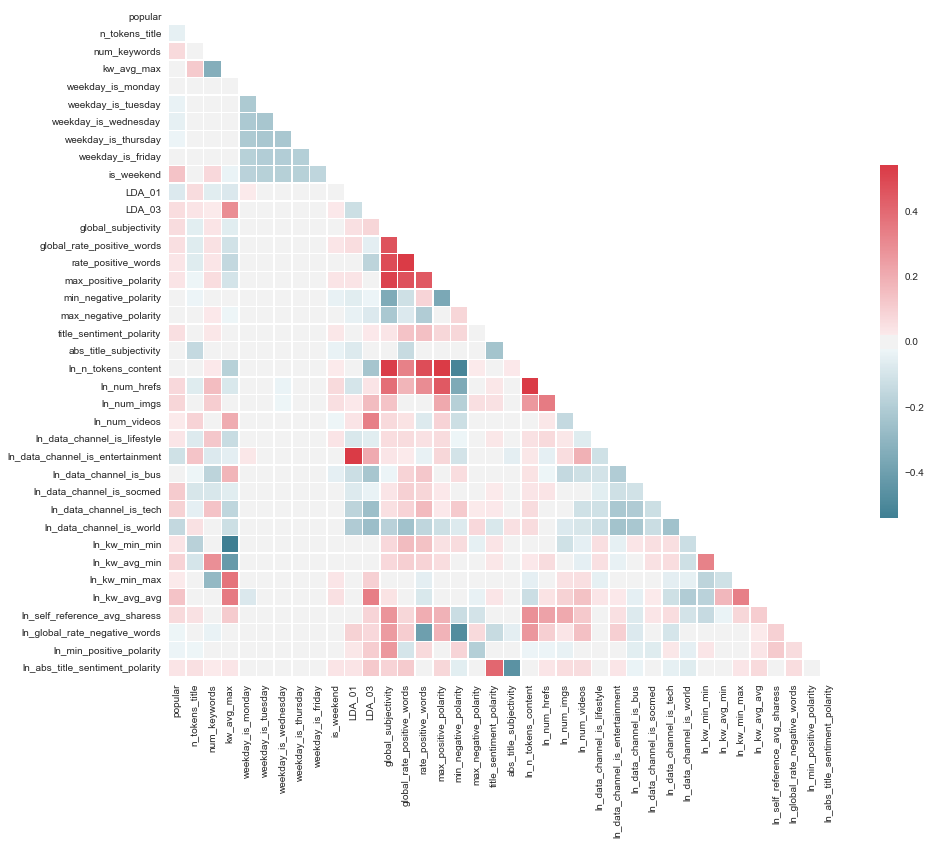

In [17]:
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 13))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


# from example found at https://www.kaggle.com/maheshdadhich/strength-of-visualization-python-visuals-tutorial/notebook

#### Save cleaned / reduced data set to external .csv file  

 - This provides opportunity to just read in this .csv file and no need to repeat data cleaning / reduction process for each execution  
 

In [19]:
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ... store in ../data/ directory
# ... write as .csv file for future recall
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

data_dir = '../../data/'
data_file = 'mashable_clean_dataset_for_lab_02_task_01.csv'

file_2_write = data_dir + data_file

df.to_csv(file_2_write, index = False)


***    
<a name='me.02.t1'></a>
<a href='#toc'>Return to Table of Contents</a>  
***  


# 	Modeling and Evaluation 2

### Holdout, Training and Test split

In [20]:
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ...  copy data frame to classification working data frame
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# ... data set with text categorical target values 

df_pop = df.copy()

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ...  separate X and y matrices 
# ...
# ...  convert to numpy matrices by calling 'values' on the pandas data frames
# ...  they are now simple matrices for compatibility with scikit-learn
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

if 'popular' in df_pop:
    y = df_pop['popular'].values         # set 'popular as dependent
    del df_pop['popular']                 # remove from dataset
    X = df_pop.values                        # use everything else for independent EVs

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ...  setup master train and test , golden traina and test
# ...  master sets - first 80% of original data set which will be base training for model building
# ...  Golden sets - 20% of original will be used in the final best model for prediction
# ...  split into training and test sets
# ....  --> 10 folds
# ...   --> 80% / 20% training / test
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=




In [21]:
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ... Set-up golden test data set
# ... This data-set will be used to evaluate the predictive capability of the final
# ... model on a data set that was not included in any of the prior train/test sets
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

num_cv_iterations = 1
cv_object = ShuffleSplit(n_splits = num_cv_iterations,
                         test_size  = 0.2)
                        
print(cv_object)

for train_indices, test_indices in cv_object.split(X, y):
    master_X_train = X[train_indices]
    master_y_train = y[train_indices]    
    golden_X_test  = X[test_indices]
    golden_y_test  = y[test_indices]
    print(master_X_train.shape)


ShuffleSplit(n_splits=1, random_state=None, test_size=0.2, train_size=None)
(31715, 37)


In [22]:
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ... Set-up training set to be used on 'best' model from grid search results
# ... This data-set will be used to verify 10-fold-CV-model has results consistent
# ... with the model produced from grid search
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

num_cv_iterations = 1
cv_object = ShuffleSplit(n_splits = num_cv_iterations,
                         test_size  = 0.2)
                        
print(cv_object)

for train_indices, test_indices in cv_object.split(master_X_train, master_y_train):
    X_train = master_X_train[train_indices]
    y_train = master_y_train[train_indices]    
    X_test  = master_X_train[test_indices]
    y_test  = master_y_train[test_indices]
    print(X_train.shape)


ShuffleSplit(n_splits=1, random_state=None, test_size=0.2, train_size=None)
(25372, 37)


In [23]:
# set required variables for model comparison

comparison_tbl = pd.DataFrame(columns = [
    'Model Name',
    'Accuracy',
    'Precision',
    'Recall',
    'FScore',
    'Processing Time'])

i_index=[]
i_index = 0

# preparation for cross validation and model comparison, each classifier is appended once model is fit

models = []

***  
<a name='me.03.t1'></a>
<a href='#toc'>Return to Table of Contents</a>    
***  


# 	Modeling and Evaluation 3	

For task 1 we have chosen the following 4 models:<br>
a. Binary logistic regression with parament selection using Grid Search<br>
b. Decision Tree with parament selection using Grid Search<br>
c. Random Forest with parament selection using Grid Search<br>
d. Naive Bayes<br>

Each of these models will be evaluated on Accuracy, Precision, Recall, FScore and Execution time

### a. Linear logistic regression
For linear LR we have set standard attributes with:
    class_weight = balanced<br>
<b>search params:</b><br>
    tolerance parament tol<br>
    Regularization parament C<br>
    
    
#### _Grid selection for logistic regression_


In [24]:
from sklearn.grid_search import GridSearchCV

lr_model = LogisticRegression(
    class_weight = 'balanced',
    solver = 'lbfgs',
    C = 10,
    tol = 0.1)

params = {
    'C':[100, 1000], 
    'tol': [0.001, 0.0001]
}

# ... --> changed the scoring on Sat 28-Oct
# ...     - from : log_loss
# ...     - to : neg_log_loss
# ...  (this avoids the deprecation warning)

clf = GridSearchCV(
    lr_model,
    params,
    scoring = 'neg_log_loss',
    refit = 'True',
    n_jobs = -1,
    cv = 3)

grid_search = clf.fit(master_X_train, master_y_train)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

best_C = best_parameters['C']
best_tol = best_parameters['tol']



#### _Best parameter values for logistic regression_:

In [25]:
best_accuracy
best_parameters

-0.6450060035144137

{'C': 100, 'tol': 0.001}

#### Create main logistic model using best paraments for further analysis and model comparisons

In [26]:
tic = time.clock()

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ... basic Logistic Regression
# ... - normalize features based on mean & stdev of each column
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

lr_model1 = LogisticRegression(
    class_weight = 'balanced',
    solver = 'lbfgs',
    C = best_C,
    tol = best_tol)

lr_model1.fit(X_train, y_train)  # train object

y_hat = lr_model1.predict(X_test) # get test set predictions

toc =  time.clock()

# calculate statistics

accuracy = '{0:.4f}'.format(metrics.accuracy_score(y_test, y_hat))
precision = '{0:.4f}'.format(metrics.precision_score(y_test, y_hat,average='weighted'))
recall = '{0:.4f}'.format(metrics.recall_score(y_test, y_hat,average='weighted'))
f1_score = '{0:.4f}'.format(metrics.f1_score(y_test, y_hat,average='weighted'))

exetime = '{0:.4f}'.format(toc-tic)

# print statistics

print("accuracy",accuracy )
print("precision",precision )
print("recall",recall )
print("f1_score",f1_score )
print("confusion matrix\n", conf(y_test, y_hat))
print('process time',exetime)
print("\n")

# save statistics for model comparison

raw_data = {
    'Model Name' : 'Logistic Regression',
    'Accuracy' : accuracy,
    'Precision' : precision,
    'Recall' : recall,
    'FScore' : f1_score,
    'Processing Time' : exetime
}

df_tbl = pd.DataFrame(raw_data,
    columns = ['Model Name', 'Accuracy', 'Precision', 'Recall', 'FScore', 'Processing Time'],
    index = [i_index + 1])

comparison_tbl = comparison_tbl.append(df_tbl)

#append model classifier for cross-validation

models.append(('Logistic Regression', lr_model1))


LogisticRegression(C=100, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.001, verbose=0, warm_start=False)

accuracy 0.6331
precision 0.6337
recall 0.6331
f1_score 0.6332
confusion matrix
 [[2028 1225]
 [1102 1988]]
process time 0.9639




### Interpreting Weights

In [27]:
# Interpreting weights
zip_vars = zip(sum(abs(lr_model1.coef_)).T,df_pop.columns) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print('\t%-35s - weight = %9.3f' % (name, coef)) # now print them out

	kw_avg_max                          - weight =     0.001
	ln_kw_min_max                       - weight =     0.002
	n_tokens_title                      - weight =     0.013
	ln_data_channel_is_lifestyle        - weight =     0.023
	ln_self_reference_avg_sharess       - weight =     0.024
	global_rate_positive_words          - weight =     0.028
	num_keywords                        - weight =     0.030
	ln_kw_min_min                       - weight =     0.033
	ln_global_rate_negative_words       - weight =     0.038
	ln_kw_avg_min                       - weight =     0.062
	ln_num_hrefs                        - weight =     0.068
	rate_positive_words                 - weight =     0.070
	max_positive_polarity               - weight =     0.076
	abs_title_subjectivity              - weight =     0.107
	weekday_is_friday                   - weight =     0.107
	title_sentiment_polarity            - weight =     0.144
	ln_n_tokens_content                 - weight =     0.156
	ln_num_videos

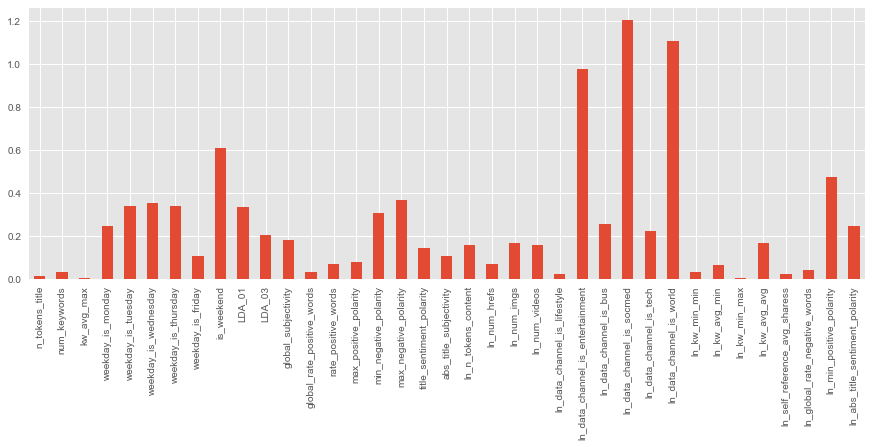

In [28]:
%matplotlib inline
rcParams['figure.figsize'] = 15, 5
plt.style.use('ggplot')

weights = pd.Series(sum(abs(lr_model1.coef_)), index = df_pop.columns)
weights.plot(kind = 'bar')
plt.show()

Above is a visual representaion of the magnitudes of the coefficients.  

To interpret the weights of each variable, I used the sums of the absolute values of the coefficients of each variable for each class. Because a particular variable might be highly positively predictive of one class and highly negatively predictive of another class, their sums would appear to have little value. I sum the absolute values to measure the total predictive value across all classes.  

It does not surprise me to see that Social Media data channel is the most predictive, since social media by nature involves sharing with connections, followed by World data channel and positive polarity. Overall, data channels social media, world, and entertainment are more predictive of the popularity.  

### b. Decision Tree Classifier using Grid Search
#### _Grid search parameter set-up_

In [29]:
# Applying Grid Search to find the best model and the best parameters

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

DTclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

parameters = [
      {
        'criterion': ['gini'], 
        'max_depth': [None, 5, 10], 
        'min_samples_split': [2, 100, 1000], 
        'min_samples_leaf': [1, 10, 100],
        'max_features': [None],
        'max_leaf_nodes': [None]
      },
      {
          'criterion': ['entropy'], 
          'max_depth': [None, 5, 10], 
          'min_samples_split': [2, 100, 1000],
          'min_samples_leaf': [1, 10, 100], 
          'max_leaf_nodes': [None]
      }
     ]

grid_search = GridSearchCV(estimator = DTclassifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3,
                           n_jobs = -1)

grid_search = grid_search.fit(master_X_train, master_y_train)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

best_accuracy
best_parameters

best_criterion = best_parameters['criterion']
best_max_depth = best_parameters['max_depth']
best_max_leaf_nodes = best_parameters['max_leaf_nodes']
best_min_samples_leaf = best_parameters['min_samples_leaf']
best_min_samples_split = best_parameters['min_samples_split']


0.6373955541541857

{'criterion': 'entropy',
 'max_depth': 5,
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

#### _Best parameters for Decision Tree_

In [30]:
best_accuracy
best_parameters

0.6373955541541857

{'criterion': 'entropy',
 'max_depth': 5,
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

#### _use best parameters to create best Decision Tree model for further analysis and model comparison_

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report

tic = time.clock()

# train and fit

DTclassifier = DecisionTreeClassifier(
    criterion = best_criterion,
    min_samples_leaf = best_min_samples_leaf,
    min_samples_split = best_min_samples_split,
    max_leaf_nodes = best_max_leaf_nodes,
    max_depth = best_max_depth)

DTclassifier.fit(X_train, y_train)
y_predDT = DTclassifier.predict(X_test)

# calculate statistics

accuracy = '{0:.4f}'.format(metrics.accuracy_score(y_test, y_predDT))
precision = '{0:.4f}'.format(metrics.precision_score(y_test, y_predDT,average='weighted'))
recall = '{0:.4f}'.format(metrics.recall_score(y_test, y_predDT,average='weighted'))
f1_score = '{0:.4f}'.format(metrics.f1_score(y_test, y_predDT,average='weighted'))
toc =  time.clock()
exetime = '{0:.4f}'.format(toc-tic)

# print statistics
print("accuracy",accuracy )
print("precision",precision )
print("recall",recall )
print("f1_score",f1_score )
print("confusion matrix\n", confusion_matrix(y_test, y_predDT))
print('process time',exetime)
print("\n")

# save statistics for model comparison

raw_data = {
    'Model Name':'Decision Tree Classifier',
    'Accuracy':accuracy,
    'Precision':precision,
    'Recall':recall,
    'FScore':f1_score,
    'Processing Time': exetime
}

df_tbl = pd.DataFrame(raw_data,
        columns = ['Model Name','Accuracy','Precision','Recall','FScore','Processing Time'],
        index = [i_index + 1])

comparison_tbl = comparison_tbl.append(df_tbl)

#append model classifier for cross-validation

models.append(('Decision Tree Classifier', DTclassifier))


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

accuracy 0.6347
precision 0.6353
recall 0.6347
f1_score 0.6348
confusion matrix
 [[2035 1218]
 [1099 1991]]
process time 0.3549




### Interpretation of importances.

In [32]:
# Interpreting weights

zip_varsDT = zip(DTclassifier.feature_importances_.T,df_pop.columns) # combine attributes

zip_varsDT = sorted(zip_varsDT)

for importance, name in zip_varsDT:
    print('\t%-35s - weight = %9.3f' % ( name, importance)) # now print them out

	LDA_03                              - weight =     0.000
	abs_title_subjectivity              - weight =     0.000
	global_rate_positive_words          - weight =     0.000
	global_subjectivity                 - weight =     0.000
	ln_abs_title_sentiment_polarity     - weight =     0.000
	ln_data_channel_is_bus              - weight =     0.000
	ln_data_channel_is_lifestyle        - weight =     0.000
	ln_global_rate_negative_words       - weight =     0.000
	ln_kw_avg_min                       - weight =     0.000
	ln_kw_min_max                       - weight =     0.000
	ln_kw_min_min                       - weight =     0.000
	ln_min_positive_polarity            - weight =     0.000
	ln_num_hrefs                        - weight =     0.000
	ln_num_imgs                         - weight =     0.000
	ln_num_videos                       - weight =     0.000
	max_negative_polarity               - weight =     0.000
	min_negative_polarity               - weight =     0.000
	n_tokens_titl

In the decision tree model, the importance of the variables are not the same as they were in the logistic regression model examined earlier. The amount of key words is most important, next are self reference average shares. This result is interesting and maybe not intuitive, but variables such as the weekend indicator and variables related to the actual sharing process such as keywords show up here.  

### c. Random Forest Classifier

#### _Grid Search parameter set-up for Random Forest classifier_

In [33]:
RFclf = RandomForestClassifier(
    criterion = 'entropy',
    max_features= 'sqrt',
    max_depth = 5,
    n_estimators = 10,
    n_jobs = -1)

#RFclf.fit(master_X_train, master_y_train)

param_grid =[
    { 
    'criterion': ['gini'],
    'n_estimators': [100, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 50]
},
 { 
    'criterion': ['entropy'],
    'n_estimators': [100, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 50]
}
]

RF_grid_search = GridSearchCV(
    estimator = RFclf,
    param_grid = param_grid,
    cv = 3)

grid_search = RF_grid_search.fit(master_X_train, master_y_train)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

best_criterion = best_parameters['criterion']
best_max_depth = best_parameters['max_depth']
best_max_features = best_parameters['max_features']
best_n_estimators = best_parameters['n_estimators']


#### _best parameters for Random Forest Classifier_

In [34]:
best_accuracy
best_parameters

0.66192653318618955

{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'sqrt',
 'n_estimators': 500}

#### _using best parameters for main model for further analysis and model comparison_

In [35]:
from sklearn.ensemble import RandomForestClassifier

tic = time.clock()

# train and test 

RFclf = RandomForestClassifier(
    criterion = best_criterion,
    max_depth = best_max_depth,
    max_features = best_max_features,
    n_estimators = best_n_estimators,
    n_jobs = -1)

RFclf.fit(X_train, y_train)
y_predRF = RFclf.predict(X_test)

# calculate statistics

accuracy = '{0:.4f}'.format(metrics.accuracy_score(y_test, y_predRF))
precision = '{0:.4f}'.format(metrics.precision_score(y_test, y_predRF, average ='weighted'))
recall = '{0:.4f}'.format(metrics.recall_score(y_test, y_predRF, average = 'weighted'))
f1_score = '{0:.4f}'.format(metrics.f1_score(y_test, y_predRF, average = 'weighted'))
toc =  time.clock()
exetime = '{0:.4f}'.format(toc-tic)

# print statistics
print("accuracy",accuracy )
print("precision",precision )
print("recall",recall )
print("f1_score",f1_score )
print("confusion matrix\n", confusion_matrix(y_test, y_predRF))
print('process time',exetime)
print("\n")


# save statistics for model comparison

raw_data = {
    'Model Name':'Random Forest Classifier',
    'Accuracy':accuracy,
    'Precision':precision,
    'Recall':recall,
    'FScore':f1_score,
    'Processing Time': exetime
}

df_tbl = pd.DataFrame(raw_data,
        columns = ['Model Name','Accuracy','Precision','Recall','FScore','Processing Time'],
        index = [i_index + 1])

comparison_tbl = comparison_tbl.append(df_tbl)

#append model classifier for cross-validation

models.append(('Random Forest Classifier', RFclf))


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=20, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

accuracy 0.6621
precision 0.6626
recall 0.6621
f1_score 0.6622
confusion matrix
 [[2129 1124]
 [1019 2071]]
process time 106.0761




### Interpreting weights

In [36]:
# Interpreting weights
zip_varsRF = zip(RFclf.feature_importances_.T,df_pop.columns) # combine attributes
zip_varsRF = sorted(zip_varsRF)
for importance, name in zip_varsDT:
    print('\t%-35s - weight = %9.3f' % ( name, importance)) # now print them out

	LDA_03                              - weight =     0.000
	abs_title_subjectivity              - weight =     0.000
	global_rate_positive_words          - weight =     0.000
	global_subjectivity                 - weight =     0.000
	ln_abs_title_sentiment_polarity     - weight =     0.000
	ln_data_channel_is_bus              - weight =     0.000
	ln_data_channel_is_lifestyle        - weight =     0.000
	ln_global_rate_negative_words       - weight =     0.000
	ln_kw_avg_min                       - weight =     0.000
	ln_kw_min_max                       - weight =     0.000
	ln_kw_min_min                       - weight =     0.000
	ln_min_positive_polarity            - weight =     0.000
	ln_num_hrefs                        - weight =     0.000
	ln_num_imgs                         - weight =     0.000
	ln_num_videos                       - weight =     0.000
	max_negative_polarity               - weight =     0.000
	min_negative_polarity               - weight =     0.000
	n_tokens_titl

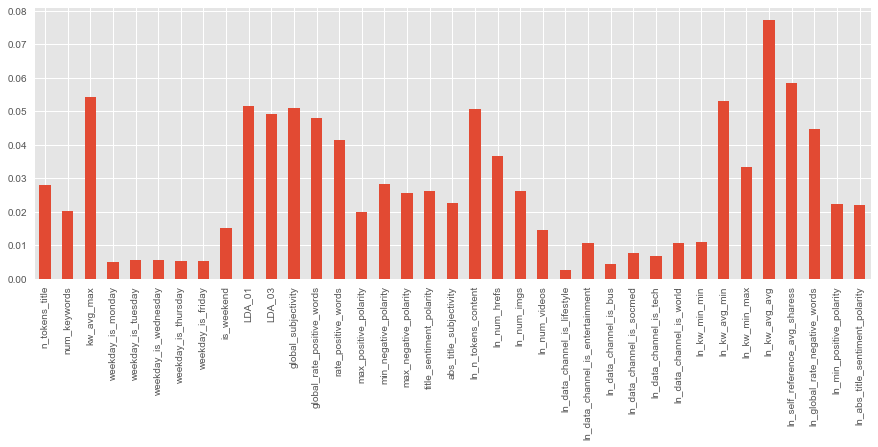

In [37]:
%matplotlib inline
rcParams['figure.figsize'] = 15, 5
plt.style.use('ggplot')

weights = pd.Series(abs(RFclf.feature_importances_), index = df_pop.columns)
weights.plot(kind = 'bar')
plt.show()

In the random forest model, the importance of the variables are not the same as they were in the logistic regression model examined earlier but are very similar to the decision tree model. The amount of key words is most important, next are self reference average shares. This result is interesting and maybe not intuitive, but variables such as the weekend indicator and variables related to the actual sharing process such as keywords show up here.  

##  d: Naive Bayes


#### d.1 Multinomial Naive Bayes

In [38]:
from sklearn.naive_bayes import MultinomialNB

MNBclf = MultinomialNB(
    alpha = 0.01,
    class_prior = None,
    fit_prior = True)

params = {
    'alpha':[0.1, 0.5, 1.0]
}

MNB_grid_search = GridSearchCV(
    MNBclf,
    params,
    cv = 3)

grid_search = MNB_grid_search.fit(master_X_train, master_y_train)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

best_accuracy
best_parameters

best_alpha = best_parameters['alpha']

0.6175311366861107

{'alpha': 0.1}

In [39]:
tic = time.clock()

# train and test 

MNBclf = MultinomialNB(
    alpha = best_alpha,
    class_prior = None,
    fit_prior = True)

MNBclf.fit(X_train, y_train)
y_predMNB = MNBclf.predict(X_test)

# calculate statistics

accuracy = '{0:.4f}'.format(metrics.accuracy_score(y_test, y_predMNB))
precision = '{0:.4f}'.format(metrics.precision_score(y_test, y_predMNB, average ='weighted'))
recall = '{0:.4f}'.format(metrics.recall_score(y_test, y_predMNB, average = 'weighted'))
f1_score = '{0:.4f}'.format(metrics.f1_score(y_test, y_predMNB, average = 'weighted'))
toc =  time.clock()
exetime = '{0:.4f}'.format(toc-tic)

# print statistics
print("accuracy",accuracy )
print("precision",precision )
print("recall",recall )
print("f1_score",f1_score )
print("confusion matrix\n", confusion_matrix(y_test, y_predMNB))
print('process time',exetime)
print("\n")


# save statistics for model comparison

raw_data = {
    'Model Name':'Multinomial Naïve Bayes',
    'Accuracy':accuracy,
    'Precision':precision,
    'Recall':recall,
    'FScore':f1_score,
    'Processing Time': exetime
}

df_tbl = pd.DataFrame(raw_data,
        columns = ['Model Name','Accuracy','Precision','Recall','FScore','Processing Time'],
        index = [i_index + 1])

comparison_tbl = comparison_tbl.append(df_tbl)

#append model classifier for cross-validation

models.append(('Multinomial Naïve Bayes', MNBclf))


MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

accuracy 0.6169
precision 0.6167
recall 0.6169
f1_score 0.6167
confusion matrix
 [[2080 1173]
 [1257 1833]]
process time 0.0351




### Interpreting weights

In [40]:
# Interpreting weights
zip_varsMNB = zip(sum(abs(MNBclf.coef_.T)),df_pop.columns) # combine attributes
zip_varsMNB = sorted(zip_varsMNB)
for coef, name in zip_varsDT:
    print('\t%-35s - weight = %9.3f' % ( name, coef)) # now print them out

	LDA_03                              - weight =     0.000
	abs_title_subjectivity              - weight =     0.000
	global_rate_positive_words          - weight =     0.000
	global_subjectivity                 - weight =     0.000
	ln_abs_title_sentiment_polarity     - weight =     0.000
	ln_data_channel_is_bus              - weight =     0.000
	ln_data_channel_is_lifestyle        - weight =     0.000
	ln_global_rate_negative_words       - weight =     0.000
	ln_kw_avg_min                       - weight =     0.000
	ln_kw_min_max                       - weight =     0.000
	ln_kw_min_min                       - weight =     0.000
	ln_min_positive_polarity            - weight =     0.000
	ln_num_hrefs                        - weight =     0.000
	ln_num_imgs                         - weight =     0.000
	ln_num_videos                       - weight =     0.000
	max_negative_polarity               - weight =     0.000
	min_negative_polarity               - weight =     0.000
	n_tokens_titl

For the multinomial naive bayes classifier, numbers of keywords and if it is posted on a weekend are the most predictive of popularity.

#### d.2 Gaussian Naive Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB

tic = time.clock()

# train and test 

GNBclf = GaussianNB()

GNBclf.fit(X_train, y_train)
y_predGNB = GNBclf.predict(X_test)

# calculate statistics

accuracy = '{0:.4f}'.format(metrics.accuracy_score(y_test, y_predGNB))
precision = '{0:.4f}'.format(metrics.precision_score(y_test, y_predGNB, average ='weighted'))
recall = '{0:.4f}'.format(metrics.recall_score(y_test, y_predGNB, average = 'weighted'))
f1_score = '{0:.4f}'.format(metrics.f1_score(y_test, y_predGNB, average = 'weighted'))
toc =  time.clock()
exetime = '{0:.4f}'.format(toc-tic)

# print statistics
print("accuracy",accuracy )
print("precision",precision )
print("recall",recall )
print("f1_score",f1_score )
print("confusion matrix\n", confusion_matrix(y_test, y_predGNB))
print('process time',exetime)
print("\n")


# save statistics for model comparison

raw_data = {
    'Model Name':'Gaussian Naïve Bayes',
    'Accuracy':accuracy,
    'Precision':precision,
    'Recall':recall,
    'FScore':f1_score,
    'Processing Time': exetime
}

df_tbl = pd.DataFrame(raw_data,
        columns = ['Model Name','Accuracy','Precision','Recall','FScore','Processing Time'],
        index = [i_index + 1])

comparison_tbl = comparison_tbl.append(df_tbl)

#append model classifier for cross-validation

models.append(('Gaussian Naïve Bayes', GNBclf))

GaussianNB(priors=None)

accuracy 0.6158
precision 0.6156
recall 0.6158
f1_score 0.6154
confusion matrix
 [[2105 1148]
 [1289 1801]]
process time 0.0386




### Interpreting weights

In [42]:
# Interpreting weights
zip_varsGNB = zip(sum(abs(GNBclf.theta_.T)),df_pop.columns) # combine attributes
zip_varsGNB = sorted(zip_varsGNB)
for theta, name in zip_varsDT:
    print('\t%-35s - weight = %9.3f' % ( name, theta)) # now print them out

	LDA_03                              - weight =     0.000
	abs_title_subjectivity              - weight =     0.000
	global_rate_positive_words          - weight =     0.000
	global_subjectivity                 - weight =     0.000
	ln_abs_title_sentiment_polarity     - weight =     0.000
	ln_data_channel_is_bus              - weight =     0.000
	ln_data_channel_is_lifestyle        - weight =     0.000
	ln_global_rate_negative_words       - weight =     0.000
	ln_kw_avg_min                       - weight =     0.000
	ln_kw_min_max                       - weight =     0.000
	ln_kw_min_min                       - weight =     0.000
	ln_min_positive_polarity            - weight =     0.000
	ln_num_hrefs                        - weight =     0.000
	ln_num_imgs                         - weight =     0.000
	ln_num_videos                       - weight =     0.000
	max_negative_polarity               - weight =     0.000
	min_negative_polarity               - weight =     0.000
	n_tokens_titl

***  
<a name='me.04.t1'></a>
<a href='#toc'>Return to Table of Contents</a>  
***  


#	Modeling and Evaluation 4

### Evaluation metrics

In [43]:
# converting acc, pre, recall, fscore and time to numeric values for plots

comparison_tbl = comparison_tbl.reset_index(drop=True)
comparison_tbl['Precision'] = pd.to_numeric(comparison_tbl['Precision'])
comparison_tbl['Accuracy'] = pd.to_numeric(comparison_tbl['Accuracy'])
comparison_tbl['FScore']= pd.to_numeric(comparison_tbl['FScore'])
comparison_tbl['Processing Time'] = pd.to_numeric(comparison_tbl['Processing Time'])
comparison_tbl['Recall'] = pd.to_numeric(comparison_tbl['Recall'])


comparison_tbl


,Model Name,Accuracy,Precision,Recall,FScore,Processing Time
0,Logistic Regression,0.6331,0.6337,0.6331,0.6332,0.9639
1,Decision Tree Classifier,0.6347,0.6353,0.6347,0.6348,0.3549
2,Random Forest Classifier,0.6621,0.6626,0.6621,0.6622,106.0761
3,Multinomial Naïve Bayes,0.6169,0.6167,0.6169,0.6167,0.0351
4,Gaussian Naïve Bayes,0.6158,0.6156,0.6158,0.6154,0.0386


#### Visualization of metrics

[None, None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None, None]

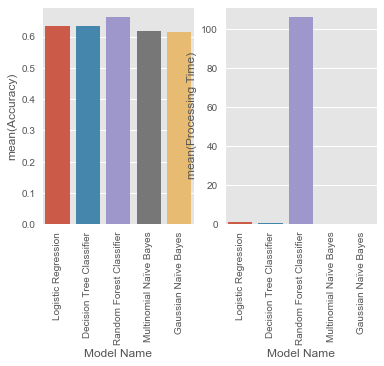

In [44]:
from pylab import rcParams
%matplotlib inline

fig, axs = plt.subplots(ncols = 2)
plt.setp(axs[0].xaxis.get_majorticklabels(), rotation = 90 )
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation = 90 )
sns.barplot(x = 'Model Name', y = 'Accuracy', data = comparison_tbl, ax = axs[0])
sns.barplot(data = comparison_tbl, y = 'Processing Time', x = 'Model Name', ax = axs[1])


# 10-K Cross-Validation for each classifier
For each classifier we run 10 fold cross validation which will help us narrow down one final model

In [45]:
from sklearn import model_selection

# evaluate each model in turn

results = []
names = []
scoring = 'accuracy'

for name, model in models:
    cv_results = model_selection.cross_val_score(
        model,
        master_X_train,
        master_y_train,
        cv = 10,
        scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "\t%-35s mean (std dev): %.3f (%.4f)" % (name, cv_results.mean(), cv_results.std())
    #print(cv_results)
    print(msg)

	Logistic Regression                 mean (std dev): 0.632 (0.0084)
	Decision Tree Classifier            mean (std dev): 0.638 (0.0075)
	Random Forest Classifier            mean (std dev): 0.661 (0.0060)
	Multinomial Naïve Bayes             mean (std dev): 0.618 (0.0077)
	Gaussian Naïve Bayes                mean (std dev): 0.621 (0.0071)


{'boxes': [<matplotlib.lines.Line2D at 0x11bb273c8>,
 'caps': [<matplotlib.lines.Line2D at 0x11bb31e48>,
 'fliers': [<matplotlib.lines.Line2D at 0x11bb3f7b8>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11bb398d0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x11bb27d68>,
  <matplotlib.lines.Line2D at 0x14b4cf6a0>]}

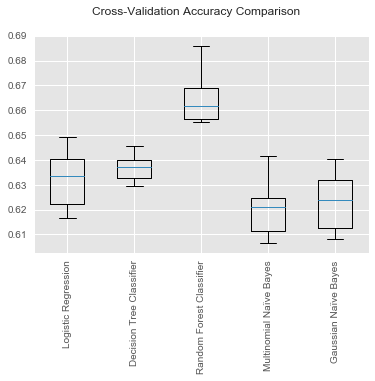

In [48]:
# boxplot accuracy comparison

fig = plt.figure()
fig.suptitle('Cross-Validation Accuracy Comparison')
ax = fig.add_subplot(111)

plt.boxplot(results)

ax.set_xticklabels(names, rotation=90)
plt.show()


***  
<a name='me.05.t1'></a>
<a href='#toc'>Return to Table of Contents</a>  
***  


## Modeling and Evaluation 5  

### statistical comparison of model accuracy differences


In [149]:
import math as m

# ...  model 1 = Decision Tree (2nd highest accuracy model)
# ...  model 2 = Random Forest (highest accuracy model)

cv_folds = 10

DT_err = 1 - results[1]
RF_err = 1 - results[2]

del_err = DT_err - RF_err
del_bar = del_err.mean()

var = 1/(cv_folds-1) * ((del_err - del_bar) * (del_err - del_bar)).sum()
st_dev = m.sqrt(var)

# ...  95% CI for 9 dof model (10 cross folds) from https://www.danielsoper.com/statcalc/calculator.aspx?id=10

t_crit = 2.262

CI_max = del_bar + 1/(m.sqrt(cv_folds)) * t_crit * st_dev
CI_min = del_bar - 1/(m.sqrt(cv_folds)) * t_crit * st_dev

zero_in_interval = (np.sign(CI_max) - np.sign(CI_min))

print("\n=-=-=-=-=-=-=-=-=-=   Statistical Comparison of Model Accuracy   -=-=-=-=-=-=-=-=-=-=-=-=-=-=")
if (not(zero_in_interval)) :
    print ("\n\n\tThe 2 models have accuracy results which exhibit a statistically signficant difference\n\n")
    print ("\tThe 95% CI for the mean error between these 2 models is : ")
    print ("\t\t (%f, %f )" % (CI_min, CI_max))
else :
    print ("\n\n\tThe 2 models have accuracy results which do not exhibit a statistically signficant difference\n\n")
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=\n")



=-=-=-=-=-=-=-=-=-=   Statistical Comparison of Model Accuracy   -=-=-=-=-=-=-=-=-=-=-=-=-=-=


	The 2 models have accuracy results which exhibit a statistically signficant difference


	The 95% CI for the mean error between these 2 models is : 
		 (0.082971, 0.102310 )
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=



## Holdout test data set prediction with our final model

Our final best model is Random Forest Classifier. We will run prediction on that fit with the test data set we set aside at the beggining of the project. We will calculate statistics for the prediction.

In [54]:
y_predFinal = RFclf.predict(golden_X_test)

# calculate statistics

accuracy = metrics.accuracy_score(golden_y_test, y_predFinal)
precision = metrics.precision_score(golden_y_test, y_predFinal, average ='weighted')
recall = metrics.recall_score(golden_y_test, y_predFinal, average = 'weighted')
f1_score = metrics.f1_score(golden_y_test, y_predFinal, average = 'weighted')
toc =  time.clock()
exetime = toc-tic

# print statistics
print ("\tSelected Model Validation on Hold-Out Data Set")
print ("\t\tAccuracy ....... = %9.3f" % (accuracy))
print ("\t\tPrecision ...... = %9.3f"% (precision))
print ("\t\tRecall ......... = %9.3f" % (recall ))
print ("\t\tF1_score ....... = %9.3f\n" % (f1_score))
print ("\t\tConfusion matrix = \n", confusion_matrix(y_test, y_predRF))
print ("\t\tProcess time ... = %9.3f" % (exetime))
print ("\n")


	Selected Model Validation on Hold-Out Data Set
		Accuracy ....... =     0.661
		Precision ...... =     0.661
		Recall ......... =     0.661
		F1_score ....... =     0.661

		Confusion matrix = 
 [[2148 1032]
 [1102 2061]]
		Process time ... =   630.403




### __Model Validation__  

 - For Task 1 - binary classifier for __popularity__ of _mashable_ articles, we selected the Random Forest classifier as having the best overall metrics from the 10-fold cross-validation. 
 
 - We then deploy that recommended model on our 20% Hold-Out data set - the data set that was not previously used in any of the model development.  

 - The results of the validation on the Hold-Out data set show that similar accuracy, precision, and recall values are achieved on this data set as were achieved from the 10-fold cross-validated model - thus, we have good confidence that the recommended model is sufficiently generalizable for additional data sets (of similar population characteristics) to be a useful model for future predictions of article popularity.  

  
<hr size = "5">  

# Task 02 - Second Classifier  

<hr size = "5">  


### __To the reader__  :  

This next section is data preparation for the Task 2 - classifier for assigning an article to a data_channel.
The method is very similar to what was employed for Task 1, but the steps here need to be repeated since the data columns retained are different between the 2 classification tasks.  

The next several sections are similar in structure and content to what was shown above, but here the data reduction and cleaning is now done specifically for the 2nd classification task.  

To avoid reviewing the repetitive nature of this section, feel free to skip to the section beginning with __Modeling & Evaluation 2__ - which begins the work that is dedicated to developing this 2nd classification model.  



### __Data Prep 01__  

Similar methods and processes as constructed for Task 1, with differences related to different data set content specific to Task 2 classification model.

### __Data Prep 02__  

Similar methods and processes as constructed for Task 1, with differences related to different data set content specific to Task 2 classification model.


***  
<a name='me.01.t2'></a>
<a href='#toc'>Return to Table of Contents</a>  
***  


### __Modeling and Evaluation 01__   

Similar as described for Task 1, with differences only related to different data set content specific to Task 2 classification model.

#### Read in dataset from .csv file  

In [98]:
data_dir = '../../data/'
data_file = 'OnlineNewsPopularity.csv'

file_2_read = data_dir + data_file
df = pd.read_csv(file_2_read)  

In [99]:
df.columns = df.columns.str.strip()
col_names = df.columns.values.tolist()

***  
<a name='dp.01.t2'></a>
<a href='#toc'>Return to Table of Contents</a>  
***  


# Data Preparation Part 1	

Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis.

### Task 2 data set definition  

 - For Task 2 classification we will classify the articles according to which data channel they are most likely to belong. The business case for this is to support directing the article to the data_channel most appropriate for the article content.  
 - In order to support this classification task, we create a new dependent variable column __data_channel__  which combines all of the individual binary boolean columns of __data_channel_is_xxx__ to __data_channel__ column with appropriate value  
 - We create 2 sets of this dependent variable, __data_channel__ and __data_channel_n__ . The only difference between these 2 columns is that __data_channel__ contains the text values for data channel category while the __data_channel_n__ contains an integer classifier (1 --> 7) which we associate to the text description in alphabetic order.  We create 2 versions of the column to be able to use the text version, when feasible, and the integer version in the case that that is required for a particular classifier routine.  
 - There are approx 15% of the articles which contain no identified __data_channel__ in the original data set. We create a new category, _Others_, for the articles without assignation to one of the standard data channels.  

In [100]:
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ... creating data_channel categorical variable
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

df['data_channel'] = 'Others'

condition = df['data_channel_is_lifestyle'] == 1
df.loc[condition, 'data_channel'] = 'Lifestyle'

condition = df['data_channel_is_entertainment'] == 1
df.loc[condition, 'data_channel'] = 'Entertainment'

condition = df['data_channel_is_bus'] == 1
df.loc[condition, 'data_channel'] = 'Business'

condition = df['data_channel_is_socmed'] == 1
df.loc[condition, 'data_channel'] = 'Social Media'

condition = df['data_channel_is_tech'] == 1
df.loc[condition, 'data_channel'] = 'Technology'

condition = df['data_channel_is_world'] == 1
df.loc[condition, 'data_channel'] = 'World'

del df['data_channel_is_lifestyle']
del df['data_channel_is_entertainment']
del df['data_channel_is_bus']
del df['data_channel_is_socmed']
del df['data_channel_is_tech']
del df['data_channel_is_world']


In [101]:
df.data_channel.value_counts()

World            8427
Technology       7346
Entertainment    7057
Business         6258
Others           6134
Social Media     2323
Lifestyle        2099
Name: data_channel, dtype: int64

In [102]:
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ... integer value of categorical values for multinomial NB classification
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

df['data_channel_n'] = 0

condition = df['data_channel'] == 'Business'
df.loc[condition, 'data_channel_n'] = 1

condition = df['data_channel'] == 'Entertainment'
df.loc[condition, 'data_channel_n'] = 2

condition = df['data_channel'] == 'Lifestyle'
df.loc[condition, 'data_channel_n'] = 3

condition = df['data_channel'] == 'Others'
df.loc[condition, 'data_channel_n'] = 4

condition = df['data_channel'] == 'Social Media'
df.loc[condition, 'data_channel_n'] = 5

condition = df['data_channel'] == 'Technology'
df.loc[condition, 'data_channel_n'] = 6

condition = df['data_channel'] == 'World'
df.loc[condition, 'data_channel_n'] = 7



### Remove variables that are not useful  


#### Delete __shares__ from the Task 2 data set 

__shares__ is the Task 1 dependent variable

we are excluding it from the Task 2 dataset as per the business model this value is not available during data_channel selection

The business model being developed here is that an article is proposed for publication, a set of text processing routines will extract and develop the model features from the raw article. The next step is to deploy the __data_channel__ assignment (classification) model, which is then also a necessary ingredient for the final model, Task 1, which is to estimate the __popularity__ of the article and thus provide recommendation to publish or not to publish.

Thus, for this Task 2 data set, we exclude the __shares__ data value.


In [103]:
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ...  shares is task 1 dependent variable
# ...  we are excluding it from this model as per business model this value is not available
# ...  during data_channel prediction
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

del df['shares'] 


In [104]:
del df['n_non_stop_words']
del df['n_non_stop_unique_tokens']
del df['n_unique_tokens']
del df['url']

In [105]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
timedelta,39644.0,354.530471,214.163767,8.00000,164.000000,339.000000,542.000000,731.000000
n_tokens_title,39644.0,10.398749,2.114037,2.00000,9.000000,10.000000,12.000000,23.000000
n_tokens_content,39644.0,546.514731,471.107508,0.00000,246.000000,409.000000,716.000000,8474.000000
num_hrefs,39644.0,10.883690,11.332017,0.00000,4.000000,8.000000,14.000000,304.000000
num_self_hrefs,39644.0,3.293638,3.855141,0.00000,1.000000,3.000000,4.000000,116.000000
num_imgs,39644.0,4.544143,8.309434,0.00000,1.000000,1.000000,4.000000,128.000000
num_videos,39644.0,1.249874,4.107855,0.00000,0.000000,0.000000,1.000000,91.000000
average_token_length,39644.0,4.548239,0.844406,0.00000,4.478404,4.664082,4.854839,8.041534
num_keywords,39644.0,7.223767,1.909130,1.00000,6.000000,7.000000,9.000000,10.000000
kw_min_min,39644.0,26.106801,69.633215,-1.00000,-1.000000,-1.000000,4.000000,377.000000


#### Assign certain variables to type integer, as appropriate

In [106]:
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ...  convert the data type to Integer
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

to_int = ['timedelta','n_tokens_title', 'n_tokens_content',
    'num_hrefs','num_self_hrefs', 'num_imgs', 'num_videos', 'num_keywords',
    'weekday_is_monday',
    'weekday_is_tuesday',
    'weekday_is_wednesday',
    'weekday_is_thursday',
    'weekday_is_friday',
    'weekday_is_saturday',
    'weekday_is_sunday',
    'is_weekend',
    'data_channel_n']
    

df[to_int] = df[to_int ].astype(np.int64)

In [107]:
df[df.duplicated()]

,timedelta,n_tokens_title,n_tokens_content,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,data_channel,data_channel_n


#### Impute kw_avg_max for 0-values and re-scale to standard normal scale

 - A small number of rows have 0 value for __kw_avg_max__, which is completely out of range for the remaining rows of this variable.    
 - We will impute these rows to median value of the column  
 
 - The magnitude of this column of data is markedly different than the range of values in the remaining columns in the data set. To bring this back in line, we will re-scale the values in this column to standard normal range

In [108]:

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ...  impute to median value for a few rows of kw_avg_max
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

condition = df['kw_avg_max'] == 0
df.loc[condition, 'kw_avg_max'] = df.kw_avg_max.median()


# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ...  scale to standard normal scale
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

df.kw_avg_max = (df.kw_avg_max - df.kw_avg_max.mean()) / df.kw_avg_max.std()


#### Constant offset for variables with min value < 0  

 - This allows to consider these variables for ln() transform if highly right-skewed and also supports some classification models that only accept independent variables that are > 0  
 - Method here is to just add -1 * min_value of any column for which min_value < 0

In [109]:
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ...  for all columns with negative values, add +1 to all values in the column
# ...  - the only columns with negative values are polarity / sentiment measures
# ...  - adding a constant to all values does not modify distributions
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

df_numeric = df.select_dtypes(['number'])
numeric_col_names = df_numeric.columns.values.tolist()

# ... store min value for each column

df_mins = df.min()

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ...  loop on each column, test for min < 0, add constant as applicable
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

for column in numeric_col_names :
    if df_mins[column] < 0 :
        df[column] = df[column] - df_mins[column]
        
#        print('--> min_value < 0 adjusted : ', column, df_mins[column])

#### Ln() transform for variables that are right skewed (skewness > 1)  

 - This facilitiates maintaining more normally distributed residuals for regression models  
 - Likely, this will not be needed for the classification task, at present, but also does not have negative effects for this current activity


In [110]:
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ...  ln() transform right skewed distribution variables (skewness > 1)
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

df_numeric = df.select_dtypes(['number'])

numeric_col_names = df_numeric.columns.values.tolist()

# ... store min value for each column

df_mins = df.min()

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ...  loop on each column, test for skewness, create new column if conditions met
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

columns_to_drop = []

for column in numeric_col_names:
    sk = df[column].skew()
    
    if(sk > 1):
        new_col_name='ln_' + column
        print (column, sk, new_col_name)
        
        if df_mins[column] > 0:
            df[new_col_name] = np.log(df[column])
            columns_to_drop.append(column)
            
        elif df_mins[column] == 0:
            df_tmp = df[column] + 1
            df[new_col_name] = np.log(df_tmp)
            columns_to_drop.append(column)
            
        else:
            print('--> Ln() transform not completed -- skew > 1, but min value < 0 :', column, '!!')
            
            
# ... delete tmp data

del df_tmp
del df_mins
del df_numeric

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ...  based on inspection, a few of these are just not valid ranges in ln() space
# ...  -- just delete these few back out of the data set
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

print (columns_to_drop)

del df['ln_LDA_00']
del df['ln_LDA_01']
del df['ln_LDA_02']
del df['ln_LDA_03']
del df['ln_LDA_04']
columns_to_drop.remove('LDA_00')
columns_to_drop.remove('LDA_01')
columns_to_drop.remove('LDA_02')
columns_to_drop.remove('LDA_03')
columns_to_drop.remove('LDA_04')

# ...  these are binary indicators ... so no need to ln-transform

del df['ln_weekday_is_monday']
del df['ln_weekday_is_tuesday']
del df['ln_weekday_is_wednesday']
del df['ln_weekday_is_thursday']
del df['ln_weekday_is_friday']
del df['ln_weekday_is_saturday']
del df['ln_weekday_is_sunday']
del df['ln_is_weekend']
columns_to_drop.remove('is_weekend')
columns_to_drop.remove('weekday_is_monday')
columns_to_drop.remove('weekday_is_tuesday')
columns_to_drop.remove('weekday_is_wednesday')
columns_to_drop.remove('weekday_is_thursday')
columns_to_drop.remove('weekday_is_friday')
columns_to_drop.remove('weekday_is_saturday')
columns_to_drop.remove('weekday_is_sunday')

#columns_to_drop.remove('data_channel')

print ('\n-----------------------------------\n')
print ('Number of current columns in dataset :', len(df.columns))

df.drop(columns_to_drop, axis = 1, inplace = True)

#df.info()


n_tokens_content 2.94542193879 ln_n_tokens_content
num_hrefs 4.0134948282 ln_num_hrefs
num_self_hrefs 5.17275110576 ln_num_self_hrefs
num_imgs 3.94659584465 ln_num_imgs
num_videos 7.0195327863 ln_num_videos
kw_min_min 2.37494728018 ln_kw_min_min
kw_max_min 35.3284337312 ln_kw_max_min
kw_avg_min 31.3061081027 ln_kw_avg_min
kw_min_max 10.3863716348 ln_kw_min_max
kw_max_avg 16.4116695554 ln_kw_max_avg
kw_avg_avg 5.76017729162 ln_kw_avg_avg
self_reference_min_shares 26.2643641603 ln_self_reference_min_shares
self_reference_max_shares 13.8708490494 ln_self_reference_max_shares
self_reference_avg_sharess 17.9140933777 ln_self_reference_avg_sharess
weekday_is_monday 1.77590824423 ln_weekday_is_monday
weekday_is_tuesday 1.61054706191 ln_weekday_is_tuesday
weekday_is_wednesday 1.60097097689 ln_weekday_is_wednesday
weekday_is_thursday 1.6370700483 ln_weekday_is_thursday
weekday_is_friday 2.03030483518 ln_weekday_is_friday
weekday_is_saturday 3.63708575997 ln_weekday_is_saturday
weekday_is_sunday

***    
<a name='dp.02.t2'></a>
<a href='#toc'>Return to Table of Contents</a>  
***  

# Data Preparation Part 2

#### Data Selection - Task 2 - data_channel classification

- There are 60 columns in the original data set; we added a few additonal columns based on observed opportunities (e.g., _publication_date_, ...) as explained above. 
    
- From this data set, we did a simple correlation matrix to look for variables that are highly correlated with each other that could be removed with little loss of information.

- With that downselection, we proceeded with additional evaluation of these remaining variables.
    
- we recognize that there is likely significant additional opportunity for modeling improvements with many of the remaining variables, and will look to re-expand the data set to further consider that with future work.  

In [111]:

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ... display highest correlation pairs from corr() matrix 
# ...
# ... https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

df_numeric = df.select_dtypes(['number'])

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n = 5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels = labels_to_drop).sort_values(ascending = False)
    return au_corr[0:n]

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ... list out Top30 correlations
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

n_val = 30

top_30_corr_list = get_top_abs_correlations(df_numeric, n_val)
print("\n\n-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-")
print("Top Absolute Correlations\n")
print(top_30_corr_list)


icor = 0
drop_column = list()
while (top_30_corr_list[icor] > 0.65):
    drop_column.append(top_30_corr_list[top_30_corr_list == top_30_corr_list[icor]].index[0][0])
    icor += 1

drop_column = list(set(drop_column))

print("\n\n-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-")
print("Columns Recommended for removal based on correlation > 0.65")
print("-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-\n")

print("\n".join(sorted(drop_column)))

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ... drop one of the high correlation columns (2nd of the pair)
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

df = df.drop(drop_column, axis = 1)

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ... show correlation test with remaining, to confirm
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

df_reduced_numeric = df.select_dtypes(['number'])

top_30_corr_list = get_top_abs_correlations(df_reduced_numeric, n_val)

print("\n\n-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-")
print("\n\nTop Absolute Correlations (2nd Pass)\n")
print(top_30_corr_list)




-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Top Absolute Correlations

ln_self_reference_max_shares  ln_self_reference_avg_sharess      0.994639
ln_self_reference_min_shares  ln_self_reference_avg_sharess      0.971014
ln_kw_max_min                 ln_kw_avg_min                      0.946087
ln_self_reference_min_shares  ln_self_reference_max_shares       0.945943
kw_min_avg                    ln_kw_min_max                      0.926784
ln_kw_max_avg                 ln_kw_avg_avg                      0.899409
timedelta                     ln_kw_min_min                      0.822783
kw_max_max                    ln_kw_min_min                      0.820625
rate_negative_words           ln_global_rate_negative_words      0.782517
average_token_length          ln_n_tokens_content                0.768795
avg_negative_polarity         min_negative_polarity              0.748896
title_subjectivity            ln_abs_title_sentiment_polarity    0.741229
global_sentiment_polarity

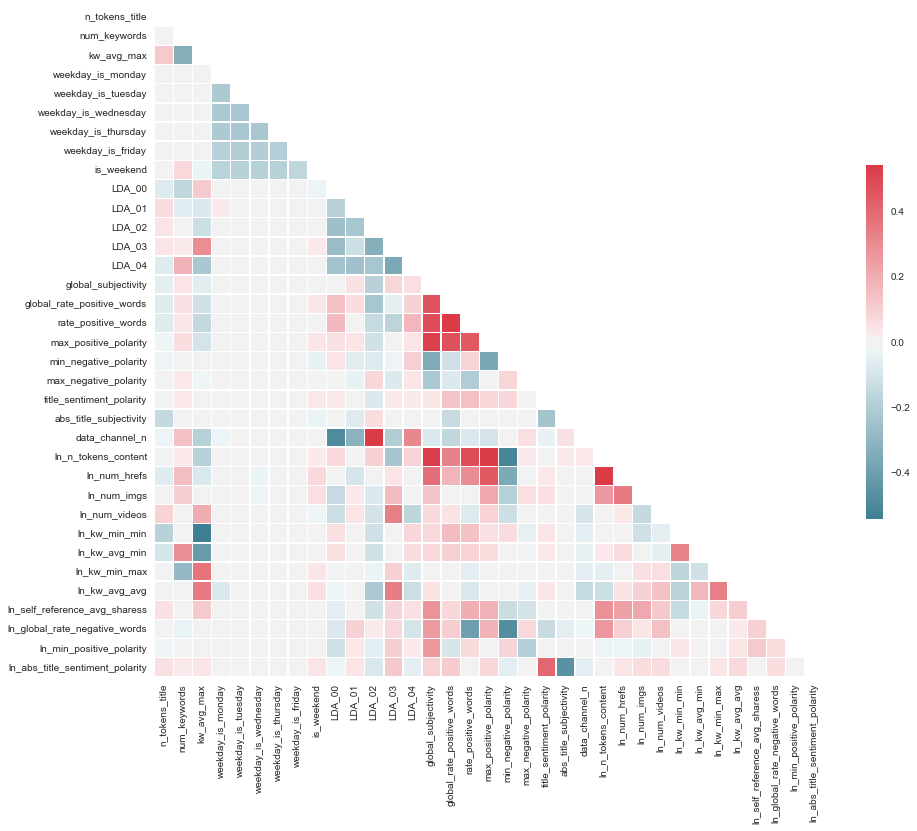

In [112]:
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 13))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


# from example found at https://www.kaggle.com/maheshdadhich/strength-of-visualization-python-visuals-tutorial/notebook

#### Save cleaned / reduced data set to external .csv file  

 - This provides opportunity to just read in this .csv file and no need to repeat data cleaning / reduction process for each execution  
 

In [113]:
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ... store in ../data/ directory
# ... write as .csv file for future recall
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

data_dir = '../../data/'
data_file = 'mashable_clean_dataset_for_lab_02_task_02.csv'

file_2_write = data_dir + data_file

df.to_csv(file_2_write, index = False)


***  
<a name='me.02.t2'></a>
<a href='#toc'>Return to Table of Contents</a>  
***  

# 	Modeling and Evaluation 2

### Holdout, Training and Test split

In [114]:
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ...  copy data frame to classification working data frame
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# ... data set with text categorical target values 

df_data_channel = df.copy()
del df_data_channel['data_channel_n']

# ... data set with integer categorical target values 

df_data_channel_n = df.copy()
del df_data_channel_n['data_channel']

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ...  separate X and y matrices 
# ...
# ...  convert to numpy matrices by calling 'values' on the pandas data frames
# ...  they are now simple matrices for compatibility with scikit-learn
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

if 'data_channel' in df_data_channel:
    y = df_data_channel['data_channel'].values         # set 'data_channel' as dependent
    del df_data_channel['data_channel']                # remove from dataset
    X = df_data_channel.values                         # use everything else for independent EVs

if 'data_channel_n' in df_data_channel_n:
    y_n = df_data_channel_n['data_channel_n'].values    # set 'data_channel' as dependent
    del df_data_channel_n['data_channel_n']             # remove from dataset
    X_n = df_data_channel_n.values                      # use everything else for independent EVs

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ...  setup master train and test , golden traina and test
# ...  master sets - first 80% of original data set which will be base training for model building
# ...  Golden sets - 20% of original will be used in the final best model for prediction
# ...  split into training and test sets
# ....  --> 10 folds
# ...   --> 80% / 20% training / test
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=




In [115]:
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ... Set-up golden test data set
# ... This data-set will be used to evaluate the predictive capability of the final
# ... model on a data set that was not included in any of the prior train/test sets
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

num_cv_iterations = 1
cv_object = ShuffleSplit(n_splits = num_cv_iterations,
                         test_size  = 0.2)
                        
print(cv_object)

for train_indices, test_indices in cv_object.split(X, y):
    master_X_train = X[train_indices]
    master_y_train = y[train_indices]    
    golden_X_test  = X[test_indices]
    golden_y_test  = y[test_indices]
    print(master_X_train.shape)

for train_indices_n, test_indices_n in cv_object.split(X_n, y_n): 
    master_X_train_n = X_n[train_indices_n]
    master_y_train_n = y_n[train_indices_n]    
    golden_X_test_n  = X_n[test_indices_n]
    golden_y_test_n  = y_n[test_indices_n]
    
    
    

ShuffleSplit(n_splits=1, random_state=None, test_size=0.2, train_size=None)
(31715, 34)


In [116]:
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ... Set-up training set to be used on 'best' model from grid search results
# ... This data-set will be used to verify 10-fold-CV-model has results consistent
# ... with the model produced from grid search
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

num_cv_iterations = 1
cv_object = ShuffleSplit(n_splits = num_cv_iterations,
                         test_size  = 0.2)
                        
print(cv_object)

for train_indices, test_indices in cv_object.split(master_X_train, master_y_train):
    X_train = master_X_train[train_indices]
    y_train = master_y_train[train_indices]    
    X_test  = master_X_train[test_indices]
    y_test  = master_y_train[test_indices]
    print(X_train.shape)

for train_indices_n, test_indices_n in cv_object.split(master_X_train_n, master_y_train_n): 
    X_train_n = master_X_train_n[train_indices_n]
    y_train_n = master_y_train_n[train_indices_n]    
    X_test_n  = master_X_train_n[test_indices_n]
    y_test_n  = master_y_train_n[test_indices_n]


ShuffleSplit(n_splits=1, random_state=None, test_size=0.2, train_size=None)
(25372, 34)


In [117]:
# set required variables for model comparison

comparison_tbl = pd.DataFrame(columns = [
    'Model Name',
    'Accuracy',
    'Precision',
    'Recall',
    'FScore',
    'Processing Time'])

i_index=[]
i_index = 0

# preparation for cross validation and model comparison, each classifier is appended once model is fit

models = []

***  
<a name='me.03.t2'></a>
<a href='#toc'>Return to Table of Contents</a>  
***  

# 	Modeling and Evaluation 3	

For task 2 we have chosen the following 4 models:<br>
a. Multinomial logistic regression with parament selection using Grid Search<br>
b. Decision Tree with parament selection using Grid Search<br>
c. Random Forest with parament selection using Grid Search<br>
d. Naive Bayes<br>

Each of these models will be evaluated on Accuracy, Precision, Recall, FScore and Execution time

### a. Multinomial logistic regression
For multinomial LR we have set standard attributes with:
    class_weight = balanced<br>
    multi_class = multinomial<br>
<b>search params:</b><br>
    tolerance parament tol<br>
    Regularization parament C<br>
    
    
#### _Grid selection for logistic regression_

In [118]:
from sklearn.grid_search import GridSearchCV

lr_model = LogisticRegression(
    class_weight = 'balanced',
    multi_class = 'multinomial',
    solver = 'lbfgs',
    C = 10,
    tol = 0.1)

params = {
    'C':[100, 1000], 
    'tol': [0.001, 0.0001]
}


clf = GridSearchCV(
    lr_model,
    params,
    scoring = 'neg_log_loss',
    refit = 'True',
    n_jobs = -1,
    cv = 3)

grid_search = clf.fit(master_X_train, master_y_train)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
best_C = best_parameters['C']
best_tol = best_parameters['tol']

#### _Best parameter values for logistic regression_:

In [119]:
best_accuracy
best_parameters

-0.7562061444180201

{'C': 100, 'tol': 0.001}

#### Create main logistic model using best paraments for further analysis and model comparisons

In [120]:
tic = time.clock()

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ... basic multiclass Logistic Regression
# ... - normalize features based on mean & stdev of each column
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

lr_model1 = LogisticRegression(
    class_weight = 'balanced',
    multi_class = 'multinomial',
    solver = 'lbfgs',
    C = best_C,
    tol = best_tol)

lr_model1.fit(X_train, y_train)  # train object

y_hat = lr_model1.predict(X_test) # get test set precitions

toc =  time.clock()

# calculate statistics

accuracy = '{0:.4f}'.format(metrics.accuracy_score(y_test, y_hat))
precision = '{0:.4f}'.format(metrics.precision_score(y_test, y_hat,average='weighted'))
recall = '{0:.4f}'.format(metrics.recall_score(y_test, y_hat,average='weighted'))
f1_score = '{0:.4f}'.format(metrics.f1_score(y_test, y_hat,average='weighted'))

exetime = '{0:.4f}'.format(toc-tic)

# print statistics

print("accuracy",accuracy )
print("precision",precision )
print("recall",recall )
print("f1_score",f1_score )
print("confusion matrix\n", conf(y_test, y_hat))
print('process time',exetime)
print("\n")

lr_model1_confusion_matrix = conf(y_test, y_hat)

# save statistics for model comparison

raw_data = {
    'Model Name' : 'Logistic Regression',
    'Accuracy' : accuracy,
    'Precision' : precision,
    'Recall' : recall,
    'FScore' : f1_score,
    'Processing Time' : exetime
}

df_tbl = pd.DataFrame(raw_data,
    columns = ['Model Name', 'Accuracy', 'Precision', 'Recall', 'FScore', 'Processing Time'],
    index = [i_index + 1])

comparison_tbl = comparison_tbl.append(df_tbl)

#append model classifier for cross-validation

models.append(('Logistic Regression', lr_model1))


LogisticRegression(C=100, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=1, penalty='l2',
          random_state=None, solver='lbfgs', tol=0.001, verbose=0,
          warm_start=False)

accuracy 0.7167
precision 0.7442
recall 0.7167
f1_score 0.7271
confusion matrix
 [[ 767   19   32   13  138   30   21]
 [  16  797   23  185   46    6   47]
 [  18    6  162   27   28  102    7]
 [  11  146   24  821   17    5    6]
 [  63   30   44   28  152   19   32]
 [  24   13  275    7   25  762   57]
 [  11   36   28   19   58   55 1085]]
process time 5.4225




### Heatmap of co-efficients from logistic regression viewed by data_channels

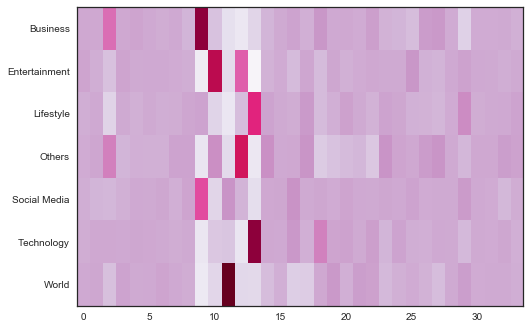

In [121]:
channels_list = sorted(df['data_channel'].unique())
channels_list.insert(0,0)
features_list = df_data_channel.columns.values.tolist()

fig, ax = plt.subplots()

plt.imshow(lr_model1.coef_, cmap = plt.get_cmap('PuRd'), aspect = 'auto')

ax.set_yticklabels(channels_list)
#ax.set_xticklabels(features_list, rotation = 'vertical')

plt.grid(False)

As we can see features 9 thru 12 are influencers for data_channel. Feature 9 to 12 are LDA_00 thru LDA_04.

#### Heatmap of confusion matrix from logistic regression

For multiclass models, confusion matrix is better visualizied as heat map

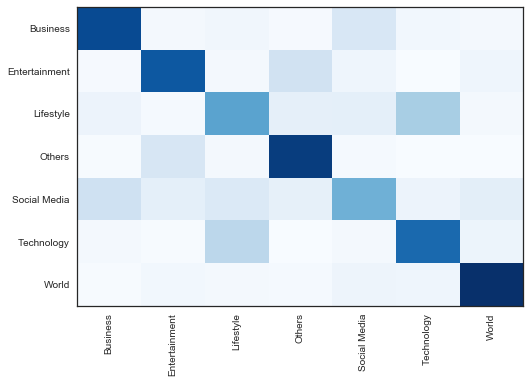

In [122]:
lr_model1_confusion_matrix = conf(y_test, y_hat)

cm_normalized = lr_model1_confusion_matrix.astype('float') / lr_model1_confusion_matrix.sum(axis=1)[:, np.newaxis]

fig, ax = plt.subplots()

plt.imshow(cm_normalized, cmap = plt.get_cmap('Blues'), aspect = 'auto')

ax.set_yticklabels(channels_list)
ax.set_xticklabels(channels_list, rotation = "vertical")

plt.grid(False)

# Interpret weights

In [123]:
zip_vars_LR = zip(sum(abs(lr_model1.coef_)).T, df_data_channel.columns) # combine attributes

print(zip_vars_LR)
for coef, name in zip_vars_LR:
    print('\t%-35s - weight = %9.3f' % (name, coef)) # now print them out
 

	n_tokens_title                      - weight =     0.589
	num_keywords                        - weight =     0.829
	kw_avg_max                          - weight =     5.535
	weekday_is_monday                   - weight =     1.001
	weekday_is_tuesday                  - weight =     0.665
	weekday_is_wednesday                - weight =     0.381
	weekday_is_thursday                 - weight =     0.657
	weekday_is_friday                   - weight =     0.548
	is_weekend                          - weight =     0.961
	LDA_00                              - weight =    15.510
	LDA_01                              - weight =    10.302
	LDA_02                              - weight =    13.688
	LDA_03                              - weight =    11.476
	LDA_04                              - weight =    16.983
	global_subjectivity                 - weight =     2.190
	global_rate_positive_words          - weight =     0.398
	rate_positive_words                 - weight =     3.041
	max_positive_

For data channel classification it is not surprising that variables that are defined to measure topical contents would be the most important. The LDA variables are much more important than others when categorizing data channel.

### b. Decision Tree Classifier using Grid Search
#### _Grid search parameter set-up_

In [124]:
# Applying Grid Search to find the best model and the best parameters

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

DTclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

parameters = [
      {
        'criterion': ['gini'], 
        'max_depth': [None], 
        'min_samples_split': [2, 100, 1000], 
        'min_samples_leaf': [1, 10, 100],
        'max_features': [None], 'max_leaf_nodes': [None]
      },
      {
          'criterion': ['entropy'], 
          'max_depth': [None, 5, 10], 
          'min_samples_split': [2, 100, 1000],
          'min_samples_leaf': [1, 10, 100], 
          'max_leaf_nodes': [None]
      }
     ]

grid_search = GridSearchCV(estimator = DTclassifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3,
                           n_jobs = -1)

grid_search = grid_search.fit(master_X_train, master_y_train)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

best_criterion = best_parameters['criterion']
best_max_depth = best_parameters['max_depth']
best_max_leaf_nodes = best_parameters['max_leaf_nodes']
best_min_samples_split = best_parameters['min_samples_split']
best_min_samples_leaf = best_parameters['min_samples_leaf']
best_max_features = best_parameters['max_features']


KeyError: 'max_features'

#### _Best parameters for Decision Tree_

In [125]:
best_accuracy
best_parameters

0.75778023017499607

{'criterion': 'entropy',
 'max_depth': None,
 'max_leaf_nodes': None,
 'min_samples_leaf': 10,
 'min_samples_split': 100}

#### _use best parameters to create best Decision Tree model for further analysis and model comparison_

In [126]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report

tic = time.clock()

# train and fit

DTclassifier = DecisionTreeClassifier(
    criterion = best_criterion,
    max_depth = best_max_depth,
    min_samples_split = best_min_samples_split,
    min_samples_leaf = best_min_samples_leaf,
    max_features = best_max_features,
    max_leaf_nodes = best_max_leaf_nodes)

DTclassifier.fit(X_train, y_train)
y_predDT = DTclassifier.predict(X_test)

# calculate statistics

accuracy = '{0:.4f}'.format(metrics.accuracy_score(y_test, y_predDT))
precision = '{0:.4f}'.format(metrics.precision_score(y_test, y_predDT,average='weighted'))
recall = '{0:.4f}'.format(metrics.recall_score(y_test, y_predDT,average='weighted'))
f1_score = '{0:.4f}'.format(metrics.f1_score(y_test, y_predDT,average='weighted'))
toc =  time.clock()
exetime = '{0:.4f}'.format(toc-tic)

# print statistics
print("accuracy",accuracy )
print("precision",precision )
print("recall",recall )
print("f1_score",f1_score )
print("confusion matrix\n", confusion_matrix(y_test, y_predDT))
print('process time',exetime)
print("\n")

# save statistics for model comparison

raw_data = {
    'Model Name':'Decision Tree Classifier',
    'Accuracy':accuracy,
    'Precision':precision,
    'Recall':recall,
    'FScore':f1_score,
    'Processing Time': exetime
}

df_tbl = pd.DataFrame(raw_data,
        columns = ['Model Name','Accuracy','Precision','Recall','FScore','Processing Time'],
        index = [i_index + 1])

comparison_tbl = comparison_tbl.append(df_tbl)

#append model classifier for cross-validation

models.append(('Decision Tree Classifier', DTclassifier))


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

accuracy 0.7254
precision 0.7042
recall 0.7254
f1_score 0.7088
confusion matrix
 [[ 808   46   14   14   44   31   63]
 [  25  818    9  184   10   23   51]
 [  40   17   53   47    9  165   19]
 [  14  142    8  837    1    9   19]
 [ 104   46   17   33   76   39   53]
 [  64   20   58   16   14  901   90]
 [  59   29    2   22    5   67 1108]]
process time 0.4723




#### heatmap of confusion matrix for Decision Tree Classifier

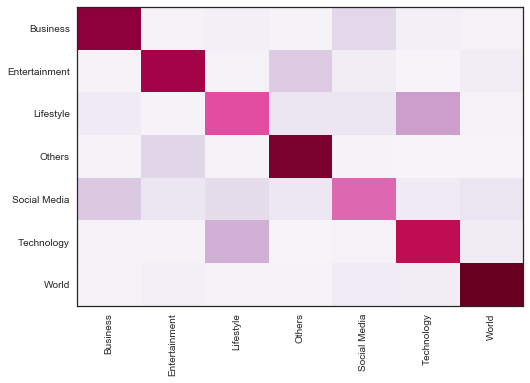

In [127]:
DT_confusion_matrix = confusion_matrix(y_test, y_hat)

cm_normalized = DT_confusion_matrix.astype('float') / DT_confusion_matrix.sum(axis=1)[:, np.newaxis]

fig, ax = plt.subplots()

plt.imshow(cm_normalized, cmap = plt.get_cmap('PuRd'), aspect = 'auto')

ax.set_yticklabels(channels_list)
ax.set_xticklabels(channels_list, rotation = "vertical")

plt.grid(False)

In [128]:
# Interpreting weights
zip_varsDT = zip(DTclassifier.feature_importances_.T, df_data_channel.columns) # combine attributes

zip_varsDT = sorted(zip_varsDT)

for importance, name in zip_varsDT:
    print('\t%-35s - importance = %9.3f' % ( name, importance)) # now print them out


	weekday_is_monday                   - importance =     0.000
	weekday_is_tuesday                  - importance =     0.000
	weekday_is_wednesday                - importance =     0.000
	weekday_is_friday                   - importance =     0.000
	weekday_is_thursday                 - importance =     0.000
	max_positive_polarity               - importance =     0.000
	title_sentiment_polarity            - importance =     0.000
	ln_abs_title_sentiment_polarity     - importance =     0.001
	min_negative_polarity               - importance =     0.001
	is_weekend                          - importance =     0.001
	abs_title_subjectivity              - importance =     0.001
	n_tokens_title                      - importance =     0.002
	ln_num_videos                       - importance =     0.003
	ln_global_rate_negative_words       - importance =     0.003
	max_negative_polarity               - importance =     0.004
	ln_num_hrefs                        - importance =     0.004
	rate_po

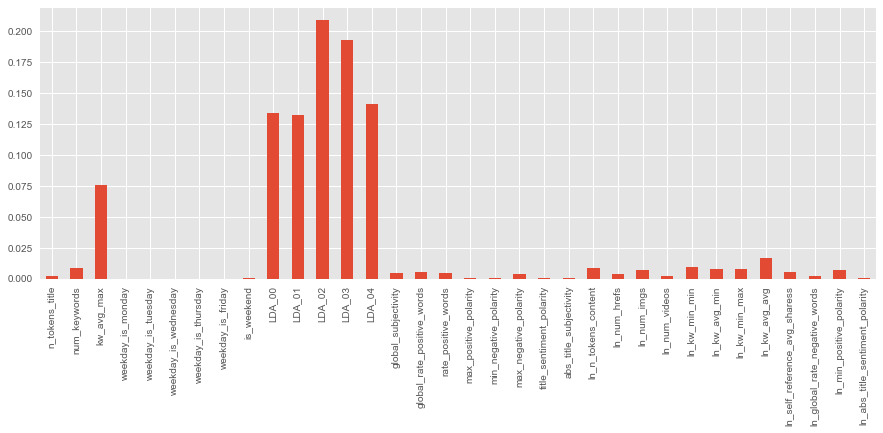

In [129]:
%matplotlib inline
rcParams['figure.figsize'] = 15, 5
plt.style.use('ggplot')

weights = pd.Series(abs(DTclassifier.feature_importances_), index = df_data_channel.columns)
weights.plot(kind = 'bar')
plt.show()

Just as with the logistic regression, it is the LDA variables that stand out as predictive of data channel using a decision tree classifier.

### c. Random Forest Classifier

#### _Grid Search parameter set-up for Random Forest classifier_

In [130]:
RFclf = RandomForestClassifier(
    criterion = 'entropy',
    max_features= 'sqrt',
    max_depth = 5,
    n_estimators = 10,
    n_jobs = -1)

#RFclf.fit(master_X_train, master_y_train)

param_grid =[
    { 
    'criterion': ['gini'],
    'n_estimators': [100, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 50]
},
 { 
    'criterion': ['entropy'],
    'n_estimators': [100, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 50]
}
]

RF_grid_search = GridSearchCV(
    estimator = RFclf,
    param_grid = param_grid,
    cv = 3)

grid_search = RF_grid_search.fit(master_X_train, master_y_train)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

best_criterion = best_parameters['criterion']
best_max_depth = best_parameters['max_depth']
best_max_features = best_parameters['max_features']
best_n_estimators = best_parameters['n_estimators']


#### _best parameters for Random Forest Classifier_

In [131]:
best_accuracy
best_parameters

0.80898628409270057

{'criterion': 'entropy',
 'max_depth': 50,
 'max_features': 'auto',
 'n_estimators': 500}

#### _using best parameters for main model for further analysis and model comparison_

In [132]:
from sklearn.ensemble import RandomForestClassifier

tic = time.clock()

# train and test 

RFclf = RandomForestClassifier(
    criterion = best_criterion,
    max_depth = best_max_depth,
    max_features = best_max_features,
    n_estimators = best_n_estimators,
    n_jobs = -1)

RFclf.fit(X_train, y_train)
y_predRF = RFclf.predict(X_test)

# calculate statistics

accuracy = '{0:.4f}'.format(metrics.accuracy_score(y_test, y_predRF))
precision = '{0:.4f}'.format(metrics.precision_score(y_test, y_predRF, average ='weighted'))
recall = '{0:.4f}'.format(metrics.recall_score(y_test, y_predRF, average = 'weighted'))
f1_score = '{0:.4f}'.format(metrics.f1_score(y_test, y_predRF, average = 'weighted'))
toc =  time.clock()
exetime = '{0:.4f}'.format(toc-tic)

# print statistics
print("accuracy",accuracy )
print("precision",precision )
print("recall",recall )
print("f1_score",f1_score )
print("confusion matrix\n", confusion_matrix(y_test, y_predRF))
print('process time',exetime)
print("\n")


# save statistics for model comparison

raw_data = {
    'Model Name':'Random Forest Classifier',
    'Accuracy':accuracy,
    'Precision':precision,
    'Recall':recall,
    'FScore':f1_score,
    'Processing Time': exetime
}

df_tbl = pd.DataFrame(raw_data,
        columns = ['Model Name','Accuracy','Precision','Recall','FScore','Processing Time'],
        index = [i_index + 1])

comparison_tbl = comparison_tbl.append(df_tbl)

#append model classifier for cross-validation

models.append(('Random Forest Classifier', RFclf))


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

accuracy 0.8118
precision 0.8081
recall 0.8118
f1_score 0.7920
confusion matrix
 [[ 928   14    3   10   10   30   25]
 [  25  932    1  111    3   25   23]
 [  32    5   44   40    9  207   13]
 [   6   66    4  929    1    7   17]
 [  85   36    5   33  128   43   38]
 [  44    8    4    4   11 1030   62]
 [  22   34    1   23    5   49 1158]]
process time 160.5427




#### heatmap of confusion matrix for Random Forest Classifier

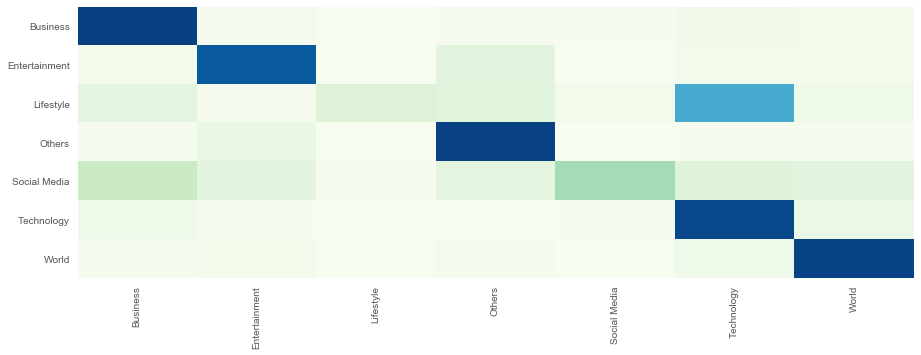

In [133]:
RF_confusion_matrix = confusion_matrix(y_test, y_predRF)

cm_normalized = RF_confusion_matrix.astype('float') / RF_confusion_matrix.sum(axis=1)[:, np.newaxis]

fig, ax = plt.subplots()

plt.imshow(cm_normalized, cmap = plt.get_cmap('GnBu'), aspect = 'auto')

ax.set_yticklabels(channels_list)
ax.set_xticklabels(channels_list, rotation = "vertical")
plt.grid(False)


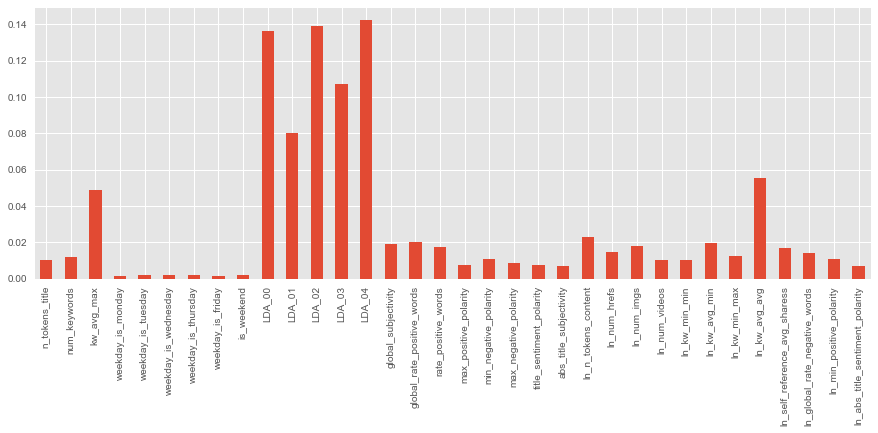

In [134]:
%matplotlib inline
rcParams['figure.figsize'] = 15, 5
plt.style.use('ggplot')

weights = pd.Series(abs(RFclf.feature_importances_), index = df_data_channel.columns)
weights.plot(kind = 'bar')
plt.show()



As expected, the LDA variables are the most predictive of data channel when using a random forest classifier, just as with the logistic regression and decision tree for this task.

###  d. Naive Bayes  

 - Evaluate both Mulinomial and Gaussian  
 - Gaussian has only default parameters, so will run grid search only on Multinomial  
 


#### d.1 Multinomial Naive Bayes

In [135]:
from sklearn.naive_bayes import MultinomialNB

MNBclf = MultinomialNB(
    alpha = 0.01,
    class_prior = None,
    fit_prior = True)

params = {
    'alpha':[0.1, 0.5, 1.0]
}

MNB_grid_search = GridSearchCV(
    MNBclf,
    params,
    cv = 3)

grid_search = MNB_grid_search.fit(master_X_train, master_y_train)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

best_accuracy
best_parameters

best_alpha = best_parameters['alpha']

0.63916128015134799

{'alpha': 0.1}

In [136]:
tic = time.clock()

# train and test 

MNBclf = MultinomialNB(
    alpha = best_alpha,
    class_prior = None,
    fit_prior = True)

MNBclf.fit(X_train, y_train)
y_predMNB = MNBclf.predict(X_test)

# calculate statistics

accuracy = '{0:.4f}'.format(metrics.accuracy_score(y_test, y_predMNB))
precision = '{0:.4f}'.format(metrics.precision_score(y_test, y_predMNB, average ='weighted'))
recall = '{0:.4f}'.format(metrics.recall_score(y_test, y_predMNB, average = 'weighted'))
f1_score = '{0:.4f}'.format(metrics.f1_score(y_test, y_predMNB, average = 'weighted'))
toc =  time.clock()
exetime = '{0:.4f}'.format(toc-tic)

# print statistics
print("accuracy",accuracy )
print("precision",precision )
print("recall",recall )
print("f1_score",f1_score )
print("confusion matrix\n", confusion_matrix(y_test, y_predMNB))
print('process time',exetime)
print("\n")


# save statistics for model comparison

raw_data = {
    'Model Name':'Multinomial Naïve Bayes',
    'Accuracy':accuracy,
    'Precision':precision,
    'Recall':recall,
    'FScore':f1_score,
    'Processing Time': exetime
}

df_tbl = pd.DataFrame(raw_data,
        columns = ['Model Name','Accuracy','Precision','Recall','FScore','Processing Time'],
        index = [i_index + 1])

comparison_tbl = comparison_tbl.append(df_tbl)

#append model classifier for cross-validation

models.append(('Multinomial Naïve Bayes', MNBclf))


MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

accuracy 0.6435
precision 0.6181
recall 0.6435
f1_score 0.6244
confusion matrix
 [[ 730   40   56   30   19   72   73]
 [  24  673   41  206   16   75   85]
 [  37   17   27   44    2  196   27]
 [  23  223   40  681    6   38   19]
 [ 106   47   15   48   25   67   60]
 [  55   29   39   21    2  879  138]
 [  23   26   23   26   16  111 1067]]
process time 0.4575




#### heatmap of confusion matrix for Multinomial Naive Bayes Classifier

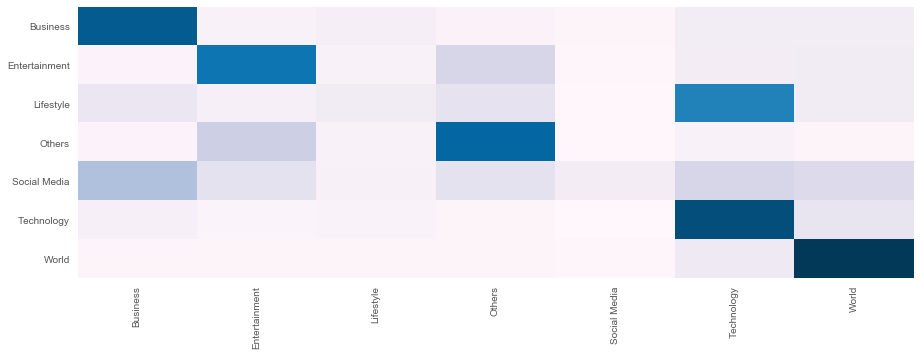

In [137]:
MNB_confusion_matrix = confusion_matrix(y_test, y_predMNB)

cm_normalized = MNB_confusion_matrix.astype('float') / MNB_confusion_matrix.sum(axis=1)[:, np.newaxis]

fig, ax = plt.subplots()

plt.imshow(cm_normalized, cmap = plt.get_cmap('PuBu'), aspect = 'auto')

ax.set_yticklabels(channels_list)
ax.set_xticklabels(channels_list, rotation = "vertical")

plt.grid(False)


In [138]:
# Interpreting weights
zip_varsMNB = zip(sum(abs(MNBclf.coef_.T)),df_data_channel.columns) # combine attributes
zip_varsMNB = sorted(zip_varsMNB)
for coef, name in zip_varsDT:
    print('\t%-35s - weight = %9.3f' % ( name, coef)) # now print them out

	weekday_is_monday                   - weight =     0.000
	weekday_is_tuesday                  - weight =     0.000
	weekday_is_wednesday                - weight =     0.000
	weekday_is_friday                   - weight =     0.000
	weekday_is_thursday                 - weight =     0.000
	max_positive_polarity               - weight =     0.000
	title_sentiment_polarity            - weight =     0.000
	ln_abs_title_sentiment_polarity     - weight =     0.001
	min_negative_polarity               - weight =     0.001
	is_weekend                          - weight =     0.001
	abs_title_subjectivity              - weight =     0.001
	n_tokens_title                      - weight =     0.002
	ln_num_videos                       - weight =     0.003
	ln_global_rate_negative_words       - weight =     0.003
	max_negative_polarity               - weight =     0.004
	ln_num_hrefs                        - weight =     0.004
	rate_positive_words                 - weight =     0.005
	global_subjec

Once again, LDA variable are most predictive of the data channel. 

#### d.2 Gaussian Naive Bayes

In [139]:
from sklearn.naive_bayes import GaussianNB

tic = time.clock()

# train and test 

GNBclf = GaussianNB()

GNBclf.fit(X_train, y_train)
y_predGNB = GNBclf.predict(X_test)

# calculate statistics

accuracy = '{0:.4f}'.format(metrics.accuracy_score(y_test, y_predGNB))
precision = '{0:.4f}'.format(metrics.precision_score(y_test, y_predGNB, average ='weighted'))
recall = '{0:.4f}'.format(metrics.recall_score(y_test, y_predGNB, average = 'weighted'))
f1_score = '{0:.4f}'.format(metrics.f1_score(y_test, y_predGNB, average = 'weighted'))
toc =  time.clock()
exetime = '{0:.4f}'.format(toc-tic)

# print statistics
print("accuracy",accuracy )
print("precision",precision )
print("recall",recall )
print("f1_score",f1_score )
print("confusion matrix\n", confusion_matrix(y_test, y_predGNB))
print('process time',exetime)
print("\n")


# save statistics for model comparison

raw_data = {
    'Model Name':'Gaussian Naïve Bayes',
    'Accuracy':accuracy,
    'Precision':precision,
    'Recall':recall,
    'FScore':f1_score,
    'Processing Time': exetime
}

df_tbl = pd.DataFrame(raw_data,
        columns = ['Model Name','Accuracy','Precision','Recall','FScore','Processing Time'],
        index = [i_index + 1])

comparison_tbl = comparison_tbl.append(df_tbl)

#append model classifier for cross-validation

models.append(('Gaussian Naïve Bayes', GNBclf))

GaussianNB(priors=None)

accuracy 0.7247
precision 0.7122
recall 0.7247
f1_score 0.7176
confusion matrix
 [[ 835   19   23   12   69   40   22]
 [  17  828   17  190   30   14   24]
 [  41    5   62   33    7  191   11]
 [   3  185   29  775   33    0    5]
 [ 123   30   39   35   79   24   38]
 [  41   10   93    2   12  933   72]
 [  23   54    8   12   45   65 1085]]
process time 0.1767




#### heatmap of confusion matrix for Gaussian Naive Bayes Classifier

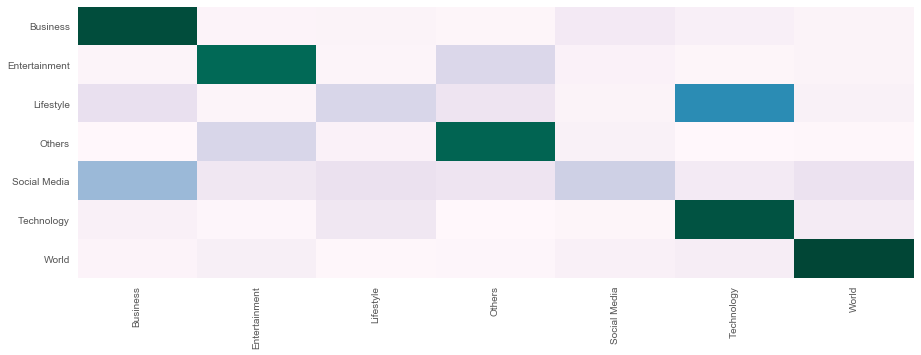

In [140]:
GNB_confusion_matrix = confusion_matrix(y_test, y_predGNB)

cm_normalized = GNB_confusion_matrix.astype('float') / GNB_confusion_matrix.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots()

plt.imshow(cm_normalized, cmap = plt.get_cmap('PuBuGn'), aspect = 'auto')

ax.set_yticklabels(channels_list)
ax.set_xticklabels(channels_list, rotation = "vertical")

plt.grid(False)


### Interpreting weights

In [141]:
# Interpreting weights
zip_varsGNB = zip(sum(abs(GNBclf.theta_.T)),df_data_channel.columns) # combine attributes
zip_varsGNB = sorted(zip_varsGNB)
for theta, name in zip_varsDT:
    print('\t%-35s - weight = %9.3f' % ( name, theta)) # now print them out

	weekday_is_monday                   - weight =     0.000
	weekday_is_tuesday                  - weight =     0.000
	weekday_is_wednesday                - weight =     0.000
	weekday_is_friday                   - weight =     0.000
	weekday_is_thursday                 - weight =     0.000
	max_positive_polarity               - weight =     0.000
	title_sentiment_polarity            - weight =     0.000
	ln_abs_title_sentiment_polarity     - weight =     0.001
	min_negative_polarity               - weight =     0.001
	is_weekend                          - weight =     0.001
	abs_title_subjectivity              - weight =     0.001
	n_tokens_title                      - weight =     0.002
	ln_num_videos                       - weight =     0.003
	ln_global_rate_negative_words       - weight =     0.003
	max_negative_polarity               - weight =     0.004
	ln_num_hrefs                        - weight =     0.004
	rate_positive_words                 - weight =     0.005
	global_subjec

It is no surprise that LDA variables continue to be the most predictive of data channel.

***   
<a name='me.04.t2'></a>
<a href='#toc'>Return to Table of Contents</a>  
***  

#	Modeling and Evaluation 4

### Evaluation Metrics

In [142]:
# converting acc, pre, recall, fscore and time to numeric values for plots

comparison_tbl = comparison_tbl.reset_index(drop=True)
comparison_tbl['Precision'] = pd.to_numeric(comparison_tbl['Precision'])
comparison_tbl['Accuracy'] = pd.to_numeric(comparison_tbl['Accuracy'])
comparison_tbl['FScore']= pd.to_numeric(comparison_tbl['FScore'])
comparison_tbl['Processing Time'] = pd.to_numeric(comparison_tbl['Processing Time'])
comparison_tbl['Recall'] = pd.to_numeric(comparison_tbl['Recall'])
comparison_tbl


,Model Name,Accuracy,Precision,Recall,FScore,Processing Time
0,Logistic Regression,0.7167,0.7442,0.7167,0.7271,5.4225
1,Decision Tree Classifier,0.7254,0.7042,0.7254,0.7088,0.4723
2,Random Forest Classifier,0.8118,0.8081,0.8118,0.7920,160.5427
3,Multinomial Naïve Bayes,0.6435,0.6181,0.6435,0.6244,0.4575
4,Gaussian Naïve Bayes,0.7247,0.7122,0.7247,0.7176,0.1767


#### Visualization of metrics

[None, None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None, None]

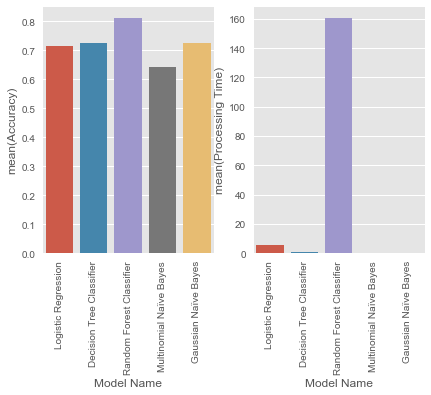

In [143]:
from pylab import rcParams
%matplotlib inline

#comparison_tbl.plot()

fig, axs = plt.subplots(ncols=2)
fig.tight_layout()
plt.setp(axs[0].xaxis.get_majorticklabels(), rotation = 90 )
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation = 90 )

sns.barplot(x = 'Model Name', y = 'Accuracy', data = comparison_tbl, ax = axs[0])

sns.barplot(data = comparison_tbl, y = 'Processing Time', x = 'Model Name', ax = axs[1])



# 10-K Cross-Validation for each classifier
For each classifier we run 10 fold cross validation which will help us narrow down one final model

In [144]:
from sklearn import model_selection

# evaluate each model in turn

results = []
names = []
scoring = 'accuracy'

for name, model in models:
    cv_results = model_selection.cross_val_score(
        model,
        master_X_train,
        master_y_train,
        cv = 10,
        scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "\n\t%-35s mean (std.dev) : %.3f (%.4f)" % (name, cv_results.mean(), cv_results.std())
    #print(cv_results)
    print(msg)


	Logistic Regression                 mean (std.dev) : 0.719 (0.0082)

	Decision Tree Classifier            mean (std.dev) : 0.721 (0.0153)

	Random Forest Classifier            mean (std.dev) : 0.814 (0.0045)

	Multinomial Naïve Bayes             mean (std.dev) : 0.639 (0.0083)

	Gaussian Naïve Bayes                mean (std.dev) : 0.721 (0.0087)


## Cross-Validation accuracy comparison of all models

{'boxes': [<matplotlib.lines.Line2D at 0x7f588c477630>,
 'caps': [<matplotlib.lines.Line2D at 0x7f588c474cf8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f588c472a58>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f588c473390>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f588c475860>,
  <matplotlib.lines.Line2D at 0x7f588c4dfb70>]}

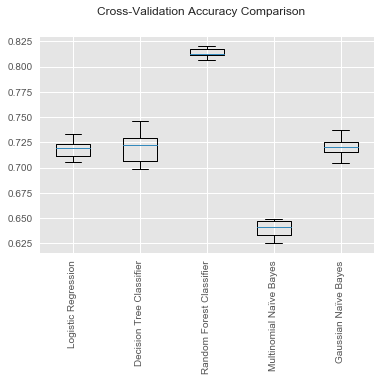

In [145]:
# boxplot accuracy comparison

fig = plt.figure()
fig.suptitle('Cross-Validation Accuracy Comparison')
ax = fig.add_subplot(111)

plt.boxplot(results)

ax.set_xticklabels(names, rotation = 90)
plt.show()


***  
<a name='me.05.t2'></a>
<a href='#toc'>Return to Table of Contents</a>  
***  

## Modeling & Evaluation 5  


### statistical comparison of 10-fold cross validation model results

In [150]:
# ...  model 1 = Decision Tree (2nd highest accuracy model)
# ...  model 2 = Random Forest (highest accuracy model)

cv_folds = 10

DT_err_t2 = 1 - results[1]
RF_err_t2 = 1 - results[2]

del_err_t2 = DT_err_t2 - RF_err_t2
del_bar_t2 = del_err_t2.mean()

var_t2 = 1/(cv_folds-1) * ((del_err_t2 - del_bar_t2) * (del_err_t2 - del_bar_t2)).sum()
st_dev_t2 = m.sqrt(var_t2)

# ...  95% CI for 9 dof model (10 cross folds) from https://www.danielsoper.com/statcalc/calculator.aspx?id=10

t_crit = 2.262

CI_max_t2 = del_bar_t2 + 1/(m.sqrt(cv_folds)) * t_crit * st_dev_t2
CI_min_t2 = del_bar_t2 - 1/(m.sqrt(cv_folds)) * t_crit * st_dev_t2

zero_in_interval_t2 = (np.sign(CI_max_t2) - np.sign(CI_min_t2))

print("\n=-=-=-=-=-=-=-=-=-=   Statistical Comparison of Model Accuracy   -=-=-=-=-=-=-=-=-=-=-=-=-=-=")

if (not(zero_in_interval_t2)) :
    print ("\n\n\tThe 2 models have accuracy results which exhibit a statistically signficant difference\n\n")
    print ("\tThe 95% CI for the mean error between these 2 models is : ")
    print ("\t\t (%f, %f )" % (CI_min_t2, CI_max_t2))
else :
    print ("\n\n\tThe 2 models have accuracy results which do not exhibit a statistically signficant difference\n\n")
    
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=\n")



=-=-=-=-=-=-=-=-=-=   Statistical Comparison of Model Accuracy   -=-=-=-=-=-=-=-=-=-=-=-=-=-=


	The 2 models have accuracy results which exhibit a statistically signficant difference


	The 95% CI for the mean error between these 2 models is : 
		 (0.082971, 0.102310 )
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=



## Holdout test data set prediction with our final model

Our final best model is Random Forest Classifier. We will run prediction on that fit with the test data set we set aside at the beggining of the project. We will calculate statistics for the prediction.

In [59]:
y_predFinal = RFclf.predict(golden_X_test)

# calculate statistics

accuracy = '{0:.4f}'.format(metrics.accuracy_score(golden_y_test, y_predFinal))
precision = '{0:.4f}'.format(metrics.precision_score(golden_y_test, y_predFinal, average ='weighted'))
recall = '{0:.4f}'.format(metrics.recall_score(golden_y_test, y_predFinal, average = 'weighted'))
f1_score = '{0:.4f}'.format(metrics.f1_score(golden_y_test, y_predFinal, average = 'weighted'))
toc =  time.clock()
exetime = '{0:.4f}'.format(toc-tic)

# print statistics
print("accuracy", accuracy )
print("precision", precision )
print("recall", recall )
print("f1_score", f1_score )
print("confusion matrix\n", confusion_matrix(y_test, y_predRF))
print('process time', exetime)
print("\n")


accuracy 0.8113
precision 0.8084
recall 0.8113
f1_score 0.7910
confusion matrix
 [[ 910   14    2    8    9   41   23]
 [  21  944    1  140    3   26   28]
 [  37   11   47   26    8  190   11]
 [  10   57   10  862    1   10   17]
 [ 100   31   10   25  122   33   42]
 [  32   19   14    3    8 1063   57]
 [  28   31    1   32    4   53 1168]]
process time 804.0741




### Final Statement regarding Task 2 Classifiers

***  
<a name='deploy'></a>
<a href='#toc'>Return to Table of Contents</a>  
***  

***  

## __Deployment__  

***  

#### Usefulness  

The usefulness of this model is to provide guidance as to which articles are to be published on the mashable.com web-site. One facet of Mashable's business model is to generate revenue by selling advertising and sponsored content on the mashable.com web-site. The value of the site to advertisers, and the revenue stream that can be protected for mashable, can be measured by the number of articles that mashable readers share with their on-line social media network. The value of this classification model is to identify the site content with higher likelihood of being popularly shared within the the target audience. 

#### Measurement of model value  
 
A way to measure the model's value is by monitoring the success of the prediction model in terms of increasing social media shares from mashable published articles. Since there can be many (very many !) factors influencing the popularity (number of shares) of articles that are beyond the applicability scope of the model, it is recommended that the value measurement be assessed by controlled A/B releases of content that is decided by current methods, side-by-side, with content that is recommended with this classification. By using a side-by-side A/B evaluation, the effectiveness of the classification model for improving content recommendations can be credibly assessed.


#### Deployment method / external data support  
 
 The current vision for deployment of the model includes these elements :  
 - a web-based user interface in which the user (the article author or other proposer) can deposit the article (title, content, embedded images and videos) in similar fashion as DropBox or other similar media-sharing file servers  
 - a parsing / feature extraction machine deployed at the shared file server site  
     - the model requires the extraction of several explanatory variables (feature extraction) from the content of the article in order to evaluate the article's popularity score in the model  
         - among the features to be extracted from the article as model inputs are the following :  
             * key-word statistics, positive and negative sentiment counts, LDA_00 --> LDA_04 scores, number of images and number of videos, sentiment polarity based on title, related hyperlink references  
         - a feature extraction machine will be deployed at the file server site to process the article content and provide the model inputs  
         - in addition, another element of the deployment is to assign the article to an appropriate data channel (e.g., Social Media, Technology, Business). this will also be an element deployed on the file server site. the text and title will be processed through a text-mining approach to evaluate the appropriate data channel.  
         
  - once the key features have been developed from the text processing machines, then all of the inputs for the classification model are available and can be executed  
  
  - the concept of the deployment is :  
    * the article is uploaded to the submittal site,  
    * the feature extraction machine is launched, then  
    * the popularity classification model is executed, and  
    * the recommendation to publish or not to publish is provided to the mashable content editor.  
    * the execution time associated to this activity is anticipated to be real-time, within less than a few seconds.  
    
  - the goal of the application is that the article, with only some minimal contextual information (requested publication date, author contact information) is sufficient to provide a __publish / no-publish recommendation__ to the content editor;  
  - the goal is that there is no need for external data gathering to feed the model in the production environment  
  
 
#### Model Updates  

 - this model is intended to estimate the _mashable_ readers' perceptions of what is interesting and relevant to share with their social media network  
 - although the model's basic input features are attempting to capture and use elements that have a certain temporal durability (positive and negative sentiments, domain segregation of vocabulary, hyper-link reference counts) the fact remains that what is popular in this moment is an ever-evolving situation. Because of that, the recommendation is that, at the initial deployment phases, the model characteristics be updated on a monthly basis. Monitoring for evolution of the model charactersitic changes will provide relevant information as to the frequency of updates going forward - either more frequent or less frequent.  
 - longer term, the survivability of this model will be dependent on the ability to deploy this model in a manner that can incorporate reinforcement learning methods. the rapidly evolving nature of what is interesting or not interesting to contemporary society is the heart of the 

        



### Recommendation
#### **Task 1 - mashable article popularity prediction**

For the popularity classification, we completed an evaluation of 4 different classifier models to identify method to classify an article as likley to be either popular or not-popular.
The results of this effort identified that the Random Forest Classifier provided the best overall results. The metrics of this classifier are as follows :
Accuracy:0.6636
Precision:0.6636
Recall: 0.6636
FScore: 0.6635

#### **Task 2 - mashable article data_channel prediction**
For the data_channel classification, we completed an evaluation of 4 different classifier models to identify method to classify an article as a particular channel.

The results of this effort identified that the Random Forest Classifier provided the best overall results. The metrics of this classifier are as follows :
Accuracy:0.8066
Precision:0.7987
Recall: 0.8066
FScore: 0.7889


***  
<a name='except'></a>
<a href='#toc'>Return to Table of Contents</a>  
***  

# 	Exceptional Work	
We have implemented Grid search in our parament selection process.